# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [7]:
# Import warnings



import warnings

In [9]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [10]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)


numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [123]:
# Try loading one file

df1 = pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/2023-1.parquet')
df2 = pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/2023-2.parquet')
df3 = pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/2023-3.parquet')
df4 = pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/2023-4.parquet')
df5 = pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/2023-5.parquet')
df6 = pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/2023-6.parquet')
df7 = pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/2023-7.parquet')
df8 = pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/2023-8.parquet')
df9 = pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/2023-9.parquet')
df10 = pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/2023-10.parquet')
df11= pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/2023-11.parquet')
df12= pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/2023-12.parquet')



In [125]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3302857 entries, 0 to 3339714
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

In [23]:
df1.tail(5)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3066761           3.05         NaN               None           107   
3066762           5.80         NaN               None           112   
3066763           4.67         NaN               None           114   
3066764           3.15         NaN               None           230   
3066765           2.85         NaN               None           262   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3066761            48             0        15.80    0.0      0.5        3.96   
3066762            75             0        22.43    0.0      0.5        2.64   
3066763           239             0        17.61    0.0      0.5        5.32   
3066764            79             0        18.15    0.0      0.5        4.43   
3066765           143             0        15.97    0.0      0.5        2.00   

         tolls_amount  improvement_surcharge  total_amount  \
3066761           0.0                    1.0         23.76   
3066762           0.0                    1.0         29.07   
3066763           0.0                    1.0         26.93   
3066764           0.0                    1.0         26.58   
3066765           0.0                    1.0         21.97   

         congestion_surcharge  airport_fee  
3066761                   NaN          NaN  
3066762                   NaN          NaN  
3066763                   NaN          NaN  
3066764                   NaN          NaN  
3066765                   NaN          NaN

In [127]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
for df in dfs :
    print(df.shape)

(3041714, 19)
(3374086, 19)
(3275796, 19)
(2792901, 19)
(2889185, 19)
(3258261, 19)
(3481547, 19)
(2875947, 19)
(2817156, 19)
(3485185, 19)
(3302857, 19)
(3333925, 19)


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [129]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
sampled_data = pd.DataFrame() #Empty dataframe
for df in dfs:
    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    sample = (
        df.groupby(['pickup_date', 'pickup_hour'], group_keys=False)
          .apply(lambda grp: grp.sample(frac=0.05, random_state=45), include_groups=False)
    )
    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

In [130]:
sampled_data.shape

(1896400, 20)

In [ ]:
original_cols = set(df1.columns.tolist())  # to check why the new shape is 20 cols and not 19 
sampled_cols = set(sampled_data.columns.tolist())

print("Missing in sampled_data:", original_cols - sampled_cols)
print("New in sampled_data   :", sampled_cols - original_cols)

In [ ]:
original_cols = set(df12.columns.tolist())  # to check why the new shape is 20 cols and not 19 
sampled_cols = set(sampled_data.columns.tolist())

print("Missing in sampled_data:", original_cols - sampled_cols)
print("New in sampled_data   :", sampled_cols - original_cols)

In [ ]:
sampled_data.columns

In [ ]:
sampled_data.head()

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.



**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [27]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

import os
import pandas as pd

# Select the folder having data files
os.chdir('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/')

# Create a list of all the twelve files to read
file_list = os.listdir()

# Initialise an empty dataframe
df = pd.DataFrame()

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        month_df = pd.read_parquet(file_path)

        # Convert pickup datetime column to datetime dtype (already is, but ensures safety)
        month_df['pickup_datetime'] = month_df['tpep_pickup_datetime']
        month_df['date'] = month_df['pickup_datetime'].dt.date
        month_df['hour'] = month_df['pickup_datetime'].dt.hour

        # Store sampled data for the current month
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in month_df['date'].unique():
            daily_data = month_df[month_df['date'] == date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_data = daily_data[daily_data['hour'] == hour]

                # Sample 5% of the hourly data randomly
                sample = hourly_data.sample(frac=0.05, random_state=45)

                # Add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)
        print(f" Processed {file_name}")
    
    except Exception as e:
        print(f" Error reading file {file_name}: {e}")


 Processed 2023-12.parquet
 Processed 2023-6.parquet
 Processed 2023-7.parquet
 Error reading file .DS_Store: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
 Processed 2023-5.parquet
 Processed 2023-11.parquet
 Processed 2023-10.parquet
 Processed 2023-4.parquet
 Processed 2023-1.parquet
 Processed 2023-8.parquet
 Processed 2023-9.parquet
 Processed 2023-2.parquet
 Processed 2023-3.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [17]:
# Store the df in csv/parquet
df.to_parquet('Final.parquet')

In [ ]:
sampled_data

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [15]:
# Load the new data file

df=pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/Final.parquet')

In [19]:
df.shape

(1896400, 23)

In [21]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:31:10   2023-12-01 00:35:37              1.0   
1         2  2023-12-01 00:00:40   2023-12-01 00:10:01              3.0   
2         2  2023-12-01 00:15:23   2023-12-01 00:32:09              5.0   
3         2  2023-12-01 00:41:11   2023-12-01 00:56:21              1.0   
4         2  2023-12-01 00:22:23   2023-12-01 00:29:21              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.10         1.0                  N           238           236   
1           1.91         1.0                  N            79           170   
2           5.13         1.0                  N           163           166   
3           2.29         1.0                  N            87            79   
4           0.84         1.0                  N           100           230   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          7.9    1.0      0.5        1.94           0.0   
1             1         11.4    1.0      0.5        3.28           0.0   
2             1         24.7    1.0      0.5        0.30           0.0   
3             1         15.6    1.0      0.5        4.12           0.0   
4             1          7.9    1.0      0.5        3.23           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         14.84                   2.5          0.0   
1                    1.0         19.68                   2.5          0.0   
2                    1.0         30.00                   2.5          0.0   
3                    1.0         24.72                   2.5          0.0   
4                    1.0         16.13                   2.5          0.0   

      pickup_datetime        date  hour  airport_fee  
0 2023-12-01 00:31:10  2023-12-01     0          NaN  
1 2023-12-01 00:00:40  2023-12-01     0          NaN  
2 2023-12-01 00:15:23  2023-12-01     0          NaN  
3 2023-12-01 00:41:11  2023-12-01     0          NaN  
4 2023-12-01 00:22:23  2023-12-01     0          NaN

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [25]:
df.drop(columns=['pickup_datetime', 'date', 'hour'], inplace=True)
df.reset_index(drop=True, inplace=True)
 

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [27]:
# Fix the index and drop any columns that are not needed


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [29]:
df.shape

(1896400, 20)

In [31]:
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            71244
trip_distance                  0
RatecodeID                 71244
store_and_fwd_flag         71244
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       71244
Airport_fee               219303
airport_fee              1748341
dtype: int64

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [33]:
# Combine the two airport fee columns

df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])

df.drop('airport_fee', axis=1, inplace=True)

In [35]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71244
trip_distance                0
RatecodeID               71244
store_and_fwd_flag       71244
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71244
Airport_fee              71244
dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [37]:
# check where values of fare amount are negative
Neg_fares= df[df.fare_amount<0]
print(f"Number of negative fare_amount entries: {len(Neg_fares)}")


Number of negative fare_amount entries: 0


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
?? there are zero records with negative fair amount hence nothing to analyse here.

In [39]:
# Find which columns have negative values

negative_cols = df.select_dtypes(include=['number']).columns

neg_counts = {col: (df[col] < 0).sum() for col in negative_cols if (df[col] < 0).any()}
negative_percent = {col: (count / len(df)) * 100 for col, count in neg_counts.items()}

if neg_counts:
    print("Columns with negative values: Counts(% of record)\n")
    for col in neg_counts:
        print(f"{col}: {neg_counts[col]} negative values ({negative_percent[col]:.4f}%)")
else:
    print("No negative values found in any numeric columns.")





Columns with negative values: Counts(% of record)

extra: 4 negative values (0.0002%)
mta_tax: 97 negative values (0.0051%)
improvement_surcharge: 104 negative values (0.0055%)
total_amount: 104 negative values (0.0055%)
congestion_surcharge: 70 negative values (0.0037%)
Airport_fee: 18 negative values (0.0009%)


In [41]:
# fix these negative values
#Treatment :because the count of these values are very low, we will just consider the absolute values of the field
columns_to_fix=['extra','mta_tax','improvement_surcharge','total_amount','congestion_surcharge','Airport_fee']
df[columns_to_fix] = df[columns_to_fix].where(df[columns_to_fix].isna(), df[columns_to_fix].abs())
print(df[columns_to_fix].min())

extra                    0.0
mta_tax                  0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
Airport_fee              0.0
dtype: float64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [43]:
# Find the proportion of missing values in each column
100*df.isnull().mean()


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.756802
trip_distance            0.000000
RatecodeID               3.756802
store_and_fwd_flag       3.756802
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.756802
Airport_fee              3.756802
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [45]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df.passenger_count.isnull()].head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
58          1  2023-12-01 00:00:00   2023-12-01 00:34:41              NaN   
80          2  2023-12-01 00:04:36   2023-12-01 00:32:12              NaN   
81          1  2023-12-01 00:01:10   2023-12-01 00:15:18              NaN   
109         2  2023-12-01 00:20:40   2023-12-01 00:27:27              NaN   
129         1  2023-12-01 00:01:13   2023-12-01 00:18:13              NaN   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
58            0.00         NaN               None           249            42   
80            4.98         NaN               None           144           143   
81            0.00         NaN               None            68           141   
109           1.09         NaN               None            13            87   
129           0.00         NaN               None           263           116   

     payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
58              0        36.57    0.0      0.5         0.0           0.0   
80              0        28.20    0.0      0.5         0.0           0.0   
81              0        20.73    0.0      0.5         0.0           0.0   
109             0        11.88    0.0      0.5         0.0           0.0   
129             0        24.72    0.0      0.5         0.0           0.0   

     improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
58                     1.0         40.57                   NaN          NaN  
80                     1.0         32.20                   NaN          NaN  
81                     1.0         24.73                   NaN          NaN  
109                    1.0         15.88                   NaN          NaN  
129                    1.0         28.72                   NaN          NaN

Did you find zeroes in passenger_count? Handle these.


In [47]:
100*(df['passenger_count'] == 0).mean() #Proportion of 0 in passenger count

1.533431765450327

Both 0 and NaN can be treated as missing values and can be replaced by Mode

In [49]:
mode = df.passenger_count.mode()[0]

df.passenger_count = df.passenger_count.replace(0, mode)
df.passenger_count = df.passenger_count.fillna(mode)


In [51]:
df.passenger_count.unique()

array([1., 3., 5., 2., 6., 4., 8., 7., 9.])

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [53]:
# Fix missing values in 'RatecodeID'
df.RatecodeID.mode()[0]

1.0

In [55]:
df.RatecodeID = df.RatecodeID.fillna(df.RatecodeID.mode()[0])

In [57]:
df.RatecodeID.isnull().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [59]:
# handle null values in congestion_surcharge - can be treated by replacing null values with median.

median=df.congestion_surcharge.median()
df.congestion_surcharge=df.congestion_surcharge.fillna(median)


In [61]:
100*df.isnull().mean()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       3.756802
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
Airport_fee              3.756802
dtype: float64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [63]:
100*df.RatecodeID.value_counts(normalize=True) 

RatecodeID
1.0     94.584792
2.0      3.791341
99.0     0.557530
5.0      0.546193
3.0      0.318551
4.0      0.201434
6.0      0.000158
Name: proportion, dtype: float64

In [65]:
df.RatecodeID.describe().round(1) 
#99 is an outlier, can be treated while handling outlier.

count    1896400.0
mean           1.6
std            7.3
min            1.0
25%            1.0
50%            1.0
75%            1.0
max           99.0
Name: RatecodeID, dtype: float64

In [67]:
# Handle any remaining missing values - store_and_fwd_flag
df.store_and_fwd_flag.unique()

array(['N', None, 'Y'], dtype=object)

In [69]:
df.store_and_fwd_flag.describe()

count     1825156
unique          2
top             N
freq      1814028
Name: store_and_fwd_flag, dtype: object

In [71]:
#replace None with mode value -N 
df.store_and_fwd_flag.fillna(df.store_and_fwd_flag.mode()[0],inplace=True)

/var/folders/p3/2hr4fjln27j60318qhkz2j1m0000gn/T/ipykernel_41852/2738943390.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.store_and_fwd_flag.fillna(df.store_and_fwd_flag.mode()[0],inplace=True)


In [73]:
df.store_and_fwd_flag.isnull().sum()

0

In [75]:
# Handle any remaining missing values-Airport_fee
df.Airport_fee.unique()

array([0.  , 1.75,  nan, 1.25])

In [259]:
# NaN can be treated with mode.75% values are 0.
df.Airport_fee.describe().round(2)

count    1825156.00
mean           0.14
std            0.47
min            0.00
25%            0.00
50%            0.00
75%            0.00
max            1.75
Name: Airport_fee, dtype: float64

In [77]:
df.Airport_fee.mode()[0]

0.0

In [79]:
df.Airport_fee.fillna(df.Airport_fee.mode()[0],inplace=True)

/var/folders/p3/2hr4fjln27j60318qhkz2j1m0000gn/T/ipykernel_41852/1947506691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Airport_fee.fillna(df.Airport_fee.mode()[0],inplace=True)


In [81]:
print(df.isnull().mean())

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
Airport_fee              0.0
dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [83]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe().round(3)

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1896400.000                     1896400                     1896400   
mean         1.737  2023-07-02 19:59:46.153772  2023-07-02 20:17:17.492720   
min          1.000         2022-12-31 23:58:59         2023-01-01 00:08:13   
25%          1.000  2023-04-02 16:11:09.250000  2023-04-02 16:31:17.250000   
50%          2.000  2023-06-27 15:46:54.500000  2023-06-27 16:06:22.500000   
75%          2.000         2023-10-06 19:37:15  2023-10-06 19:55:23.750000   
max          6.000         2023-12-31 23:58:34         2024-01-01 19:45:17   
std          0.446                         NaN                         NaN   

       passenger_count  trip_distance   RatecodeID  PULocationID  \
count      1896400.000    1896400.000  1896400.000   1896400.000   
mean             1.374          4.268        1.619       165.253   
min              1.000          0.000        1.000         1.000   
25%              1.000          1.050        1.000       132.000   
50%              1.000          1.800        1.000       162.000   
75%              1.000          3.410        1.000       234.000   
max              9.000     345729.440       99.000       265.000   
std              0.869        340.217        7.302        64.039   

       DOLocationID  payment_type  fare_amount        extra      mta_tax  \
count   1896400.000   1896400.000  1896400.000  1896400.000  1896400.000   
mean        164.009         1.160       19.905        1.572        0.495   
min           1.000         0.000        0.000        0.000        0.000   
25%         114.000         1.000        9.300        0.000        0.500   
50%         162.000         1.000       13.500        1.000        0.500   
75%         234.000         1.000       22.600        2.500        0.500   
max         265.000         4.000     6339.000       13.750        4.000   
std          69.879         0.512       18.956        1.823        0.048   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1896400.000   1896400.000            1896400.000   1896400.000   
mean         3.552         0.598                  0.999        28.972   
min          0.000         0.000                  0.000         0.000   
25%          1.000         0.000                  1.000        15.960   
50%          2.850         0.000                  1.000        21.000   
75%          4.440         0.000                  1.000        31.050   
max        380.800        87.500                  1.000      6339.000   
std          4.072         2.186                  0.028        23.397   

       congestion_surcharge  Airport_fee  
count           1896400.000  1896400.000  
mean                  2.315        0.138  
min                   0.000        0.000  
25%                   2.500        0.000  
50%                   2.500        0.000  
75%                   2.500        0.000  
max                   2.750        1.750  
std                   0.654        0.458

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [85]:
# remove passenger_count > 6
df[df.passenger_count >6].shape[0]

24

In [87]:
df = df[df.passenger_count <= 6]

In [89]:
df[df.passenger_count >6].shape[0]

0

In [91]:
# Continue with outlier handling -Entries where trip_distance is nearly 0 and fare_amount is more than 300
outlier_trip=df[(df.fare_amount>300) & (df.trip_distance<0.1)]
outlier_trip[['fare_amount','trip_distance']]


fare_amount  trip_distance
111152        326.00           0.00
122393        490.00           0.00
177185        500.00           0.00
181511        390.00           0.00
197692        355.55           0.00
228451        407.00           0.00
271543        675.00           0.00
298271        365.00           0.00
307191        380.00           0.00
327551        800.00           0.08
379252        400.00           0.00
463599        700.00           0.00
475607        420.00           0.00
604427        325.00           0.00
734916        450.00           0.00
767633        872.99           0.00
785944        389.00           0.00
796351        450.00           0.00
799510        329.00           0.00
850654        500.00           0.00
859105        686.00           0.00
860912        370.00           0.00
863990        330.00           0.00
893112        420.00           0.00
940848       6339.00           0.00
955834        600.00           0.00
992212        500.00           0.00
1047578       350.00           0.00
1083183       314.20           0.00
1094019      1116.70           0.00
1265639       400.00           0.01
1330722       500.00           0.00
1374060       305.00           0.00
1377424       351.15           0.00
1443035       460.00           0.00
1450316       350.00           0.00
1475107       355.00           0.00
1490604       350.00           0.00
1507311       400.00           0.00
1559132       400.00           0.00
1559156       400.00           0.00
1562929       475.00           0.00
1597965       550.00           0.00
1683851       533.00           0.00
1729897       500.00           0.00
1792944       305.15           0.00
1880177       341.00           0.00

In [97]:
outlier_trip.shape

(47, 19)

In [99]:
df = df[~((df.fare_amount>300) & (df.trip_distance<0.1))]


In [101]:
df[(df.fare_amount>300) & (df.trip_distance<0.1)].shape

(0, 19)

In [103]:
# Continue with outlier handling - remove entires where trip_distance and fare_amount are 0 but the pickup and dropoff zones are differen
#df_trip_fare= df[(df.trip_distance ==0) & (df.fare_amount==0)]
#df_trip_fare[(df.PULocationID != df.DOLocationID)]
print ('Before:', df.shape)
df = df[~((df.trip_distance == 0) & (df.fare_amount == 0) & (df.PULocationID != df.DOLocationID))]
print ('After:', df.shape)


#(df.PULocationID != df.DOLocationID)

Before: (1896329, 19)
After: (1896255, 19)


In [370]:
# Continue with outlier handling - Trip distance more than 250 miles
df.trip_distance.describe().round(2)

count    1896255.00
mean           4.27
std          340.23
min            0.00
25%            1.05
50%            1.80
75%            3.41
max       345729.44
Name: trip_distance, dtype: float64

In [105]:
#print ('Before:', df.shape)
df=df[(df.trip_distance<250)]

In [107]:
df.shape

(1896211, 19)

In [109]:
# Continue with outlier handling - payment_type is 0, RateCodeID=99 
#df[(df.payment_type==0)| (df.RatecodeID==99)] - this command kept on failing due to large data set 

print(df.query('RatecodeID==99').shape)
print(df.query('payment_type==0').shape)
df=df[~((df.payment_type==0) | (df.RatecodeID==99))] 

(10566, 19)
(71205, 19)


In [113]:
print(df.shape)
df.reset_index(drop=True,inplace=True)

(1814440, 19)


In [415]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [115]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Numerical
* `tpep_pickup_datetime`: datetime
* `tpep_dropoff_datetime`:datetime
* `passenger_count`:Numerical 
* `trip_distance`:Numerical 
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Numerical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` - Numerical (Continuous)
* `extra` - Numerical (Discrete)
* `mta_tax` - Numerical (Discrete)
* `tip_amount` - Numerical (Continuous)
* `tolls_amount`-Numerical (Continuous)
* `improvement_surcharge`-Numerical (Discrete)
* `total_amount`- Numerical (Continuous)
* `congestion_surcharge` - Numerical (Discrete)
* `airport_fee`-Numerical (Discrete)

In [117]:
df.head(1)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:31:10   2023-12-01 00:35:37              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.1         1.0                  N           238           236   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          7.9    1.0      0.5        1.94           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         14.84                   2.5          0.0

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [119]:
df['pickup_hour'] = df.tpep_pickup_datetime.dt.hour
df.pickup_hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

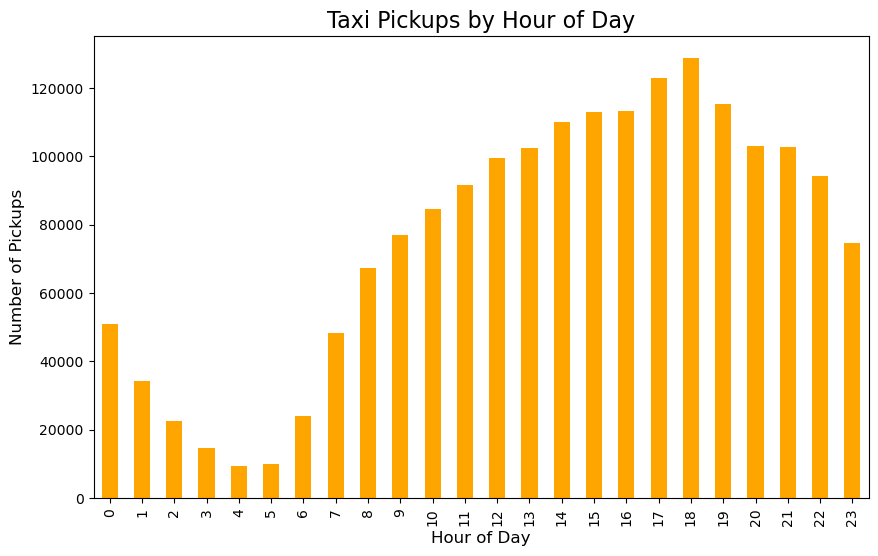

In [121]:
# Find and show the hourly trends in taxi pickups ( reran after matplotlib resintallation)

#df.pickup_hour = df.tpep_pickup_datetime.dt.hour
h_pickup=df.pivot_table(index='pickup_hour', aggfunc='size')
plt.figure(figsize=(10, 6))
h_pickup.plot.bar(color='orange')
plt.title('Taxi Pickups by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.show()

#### I will have to reinstall my matplotlib due to an issue with libraries. So i will put a checkpoint here and then reinstall and then reload the data.

In [461]:
df.to_parquet('df_final_cleaned.parquet')


In [469]:
import joblib
joblib.dump((df, sampled_data, outlier_trip), 'submission_data.pkl')

['submission_data.pkl']

In [51]:
!pip install matplotlib==3.10.0

In [53]:
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)


matplotlib version: 3.9.2
seaborn version: 0.13.2


In [5]:
import joblib
df = pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/df_final_cleaned.parquet')
df, sampled_data, outlier_trip = joblib.load('/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/trip_records/submission_data.pkl')

NameError: name 'pd' is not defined

In [123]:
df.shape 

(1814440, 20)

In [125]:
print(df.query('RatecodeID==99').shape)

(0, 20)


In [127]:
print(df.query('payment_type==0').shape)

(0, 20)


#### Resume assignment 

In [129]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df.tpep_pickup_datetime.dt.day_name()
df.pickup_day.unique()


array(['Friday', 'Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

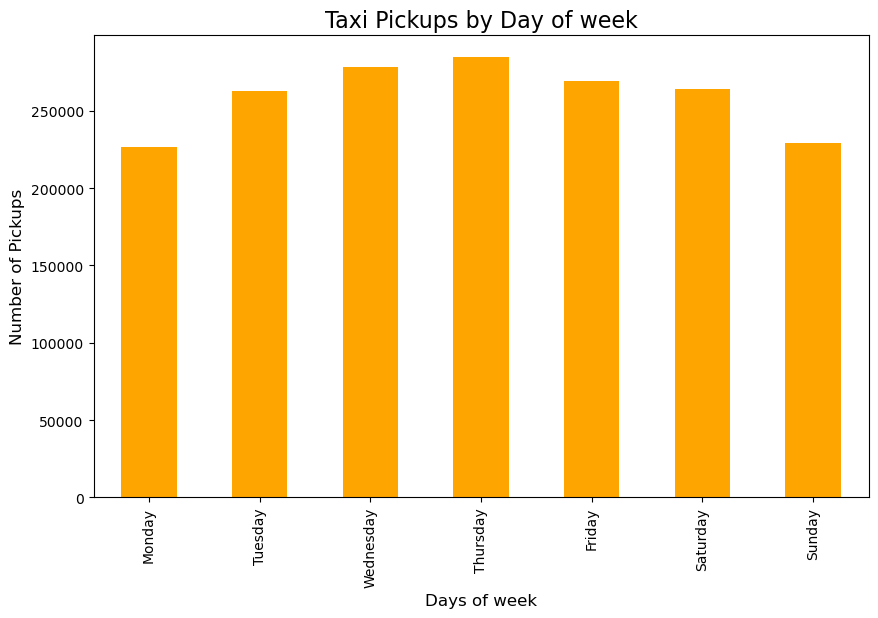

In [149]:

d_pickup=df.pivot_table(index='pickup_day', aggfunc='size')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
d_pickup = d_pickup.reindex(day_order)
plt.figure(figsize=(10, 6))
d_pickup.plot.bar(color='orange')
plt.title('Taxi Pickups by Day of week', fontsize=16)
plt.xlabel('Days of week', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.show()

In [135]:
# Show the monthly trends in pickups
df['pickup_month'] = df.tpep_pickup_datetime.dt.month_name()
df.pickup_month.unique()


array(['December', 'November', 'April', 'March', 'May', 'February',
       'October', 'September', 'August', 'January', 'July', 'June'],
      dtype=object)

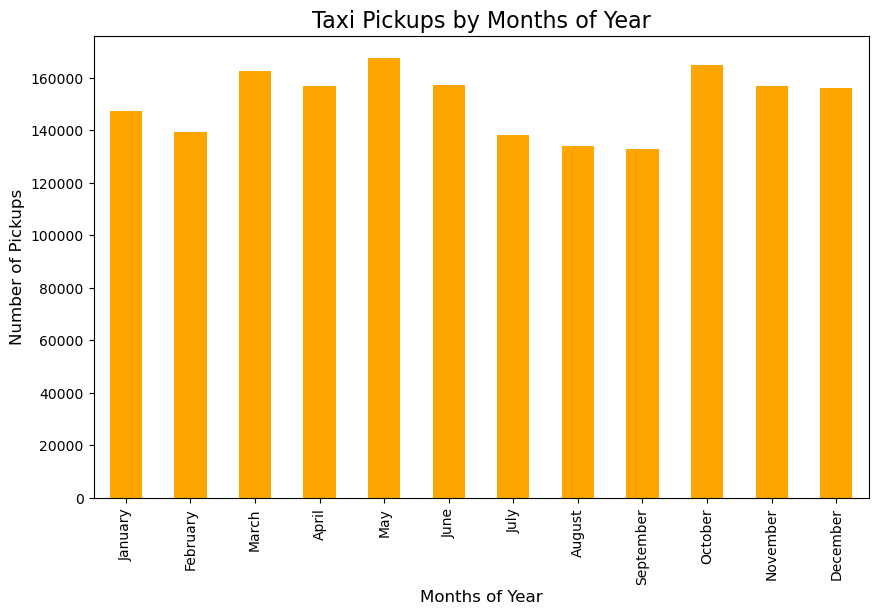

In [137]:
m_pickup = df.pivot_table(index='pickup_month', aggfunc='size')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
m_pickup = m_pickup.reindex(month_order)
plt.figure(figsize=(10, 6))
m_pickup.plot.bar(color='orange')
plt.title('Taxi Pickups by Months of Year', fontsize=16)
plt.xlabel('Months of Year', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values? 
ANSWER- There are no negative values , but there are 0 values in all of them.

In [139]:
# Analyse the above parameters
df.describe()[['fare_amount','tip_amount','total_amount','trip_distance']].round(2)


fare_amount  tip_amount  total_amount  trip_distance
count   1814440.00  1814440.00    1814440.00     1814440.00
mean         19.71        3.60         28.88           3.44
min           0.00        0.00          0.00           0.00
25%           9.30        1.00         15.96           1.05
50%          13.50        2.86         21.00           1.78
75%          21.90        4.48         30.62           3.35
max        1165.70      380.80       1177.89         222.59
std          18.37        4.09         23.03           4.56

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [73]:
df.shape

(1814440, 22)

In [141]:
# Create a df with non zero entries for the selected parameters.
df_filter=df[(df.trip_distance!=0) & (df.PULocationID != df.DOLocationID)].copy()
df_filter.shape[0] 
#copy of dataframe df where trip distance is not zero and pick up and drop are not in same location. 
#This will ensure we create a df filtering out values where trip distance is zero for records where pickup up and drop are from same zones.


1709473

In [77]:
df[df.trip_distance==0].shape[0] #but we still have zero values in trip distance.

21044

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [79]:
df.total_amount.describe().round(2)

count    1814440.00
mean          28.88
std           23.03
min            0.00
25%           15.96
50%           21.00
75%           30.62
max         1177.89
Name: total_amount, dtype: float64

In [143]:
m_revenue = df_filter.groupby("pickup_month")["total_amount"].sum()
m_revenue

pickup_month
April        4300916.64
August       3736193.50
December     4361850.08
February     3636670.57
January      3874627.15
July         3849588.01
June         4418121.93
March        4383574.84
May          4704201.32
November     4386240.06
October      4694042.06
September    3816917.00
Name: total_amount, dtype: float64

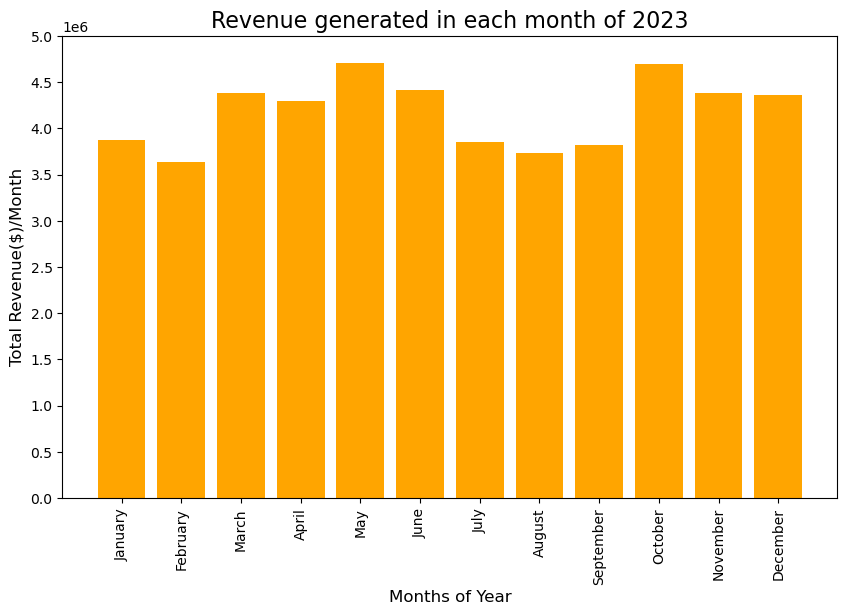

In [145]:
# Group data by month and analyse monthly revenue
m_revenue = df_filter.groupby("pickup_month")["total_amount"].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
m_revenue = m_revenue.reindex(month_order)
plt.figure(figsize=(10, 6))
plt.bar(m_revenue.index, m_revenue.values,color='orange')
max_val = m_revenue.values.max()
yticks = np.arange(0, max_val + 500_000, 500_000)
plt.title('Revenue generated in each month of 2023', fontsize=16)
plt.xlabel('Months of Year', fontsize=12)
plt.ylabel('Total Revenue($)/Month', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(yticks)
plt.show()



Highest revenue in May and loweest in February

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [147]:
# Calculate proportion of each quarter

df_filter['pickup_quarter'] = df.tpep_pickup_datetime.dt.to_period('Q')
df_filter.pickup_quarter.value_counts()

pickup_quarter
2023Q2    453759
2023Q4    450218
2023Q1    424158
2023Q3    381337
2022Q4         1
Freq: Q-DEC, Name: count, dtype: int64

In [261]:
df_filter = df_filter[df_filter.pickup_quarter.dt.year == 2023]

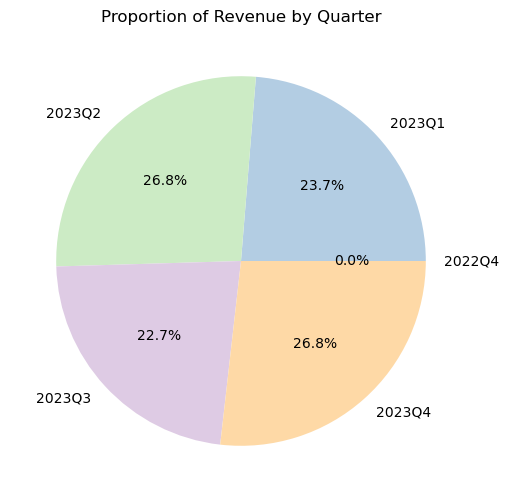

In [149]:
q_revenue = df_filter.groupby('pickup_quarter')['total_amount'].sum()
plt.figure(figsize=(10, 6))
plt.pie(q_revenue,labels=q_revenue.index,colors=plt.cm.Pastel1.colors,autopct='%1.1f%%')
plt.title('Proportion of Revenue by Quarter', fontsize=12)
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [151]:
df_dist=df_filter[df_filter.trip_distance!=0]
print(df_dist.shape)
print(df_dist.trip_distance.min())
print (df_dist.columns)

(1709473, 23)
0.01
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day', 'pickup_month', 'pickup_quarter'],
      dtype='object')


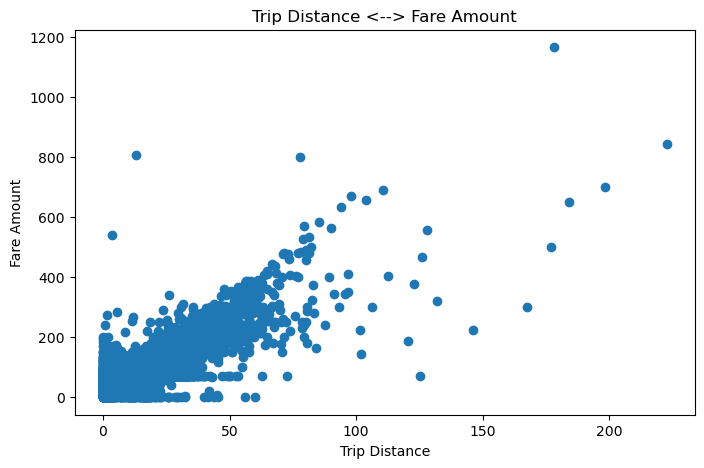

In [153]:
# Show how trip fare is affected by distance
plt.figure(figsize=(8,5))
plt.scatter(df_dist.trip_distance, df_dist.fare_amount, alpha=1)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Trip Distance <--> Fare Amount')
plt.show()


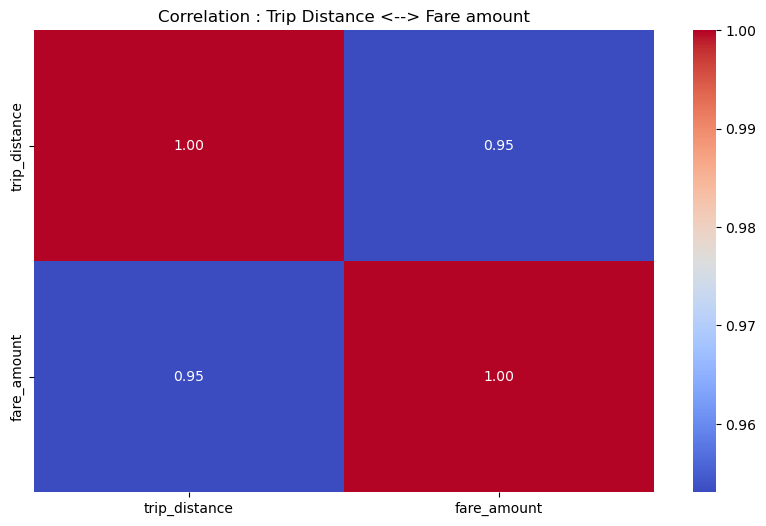

In [155]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_dist[['trip_distance', 'fare_amount']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation : Trip Distance <--> Fare amount')
plt.show()

Scatter plot and heat map shows a positive correlation between trip distance and fare amount, larger the distance higher the fare amount. 
Coorelation Coefficient between trip distance and fare amount is `0.95`, suggesting a high positive corelation.
The scatterplot shows that max no of trips are in the distance  0-75 miles and as distance increase the price varies from 0 to 400. 
Higher fared and longer distance trips are very rare.
Distributions are heavily skewed towards short distance and afforadably priced trips.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [163]:
df_dist['trip_duration'] = (df_dist.tpep_dropoff_datetime - df_dist.tpep_pickup_datetime).dt.total_seconds() / 60 
df_dist.trip_duration.describe().round(2)

count    1709473.00
mean          17.84
std           41.51
min          -56.70
25%            8.12
50%           12.98
75%           20.90
max         3726.97
Name: trip_duration, dtype: float64

In [267]:
#removing negative and zero trip duration 
df_dist[df_dist['trip_duration'] >0].shape

(1393301, 37)

In [165]:
df_dist=df_dist[df_dist['trip_duration'] >0]

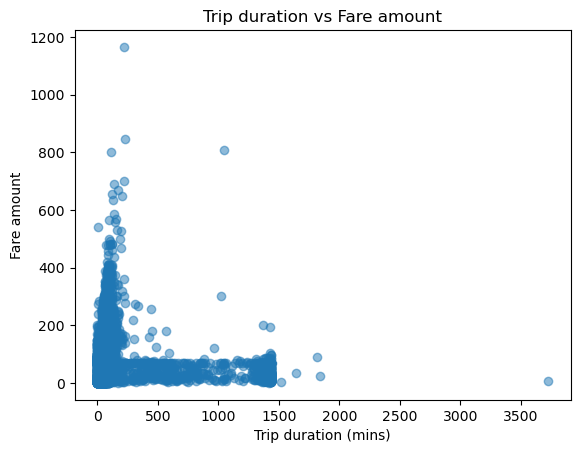

In [167]:
# Show relationship between fare and trip duration
plt.scatter(df_dist.trip_duration, df_dist.fare_amount, alpha=0.5)
plt.title('Trip duration vs Fare amount')
plt.xlabel('Trip duration (mins)')
plt.ylabel('Fare amount')
plt.show()


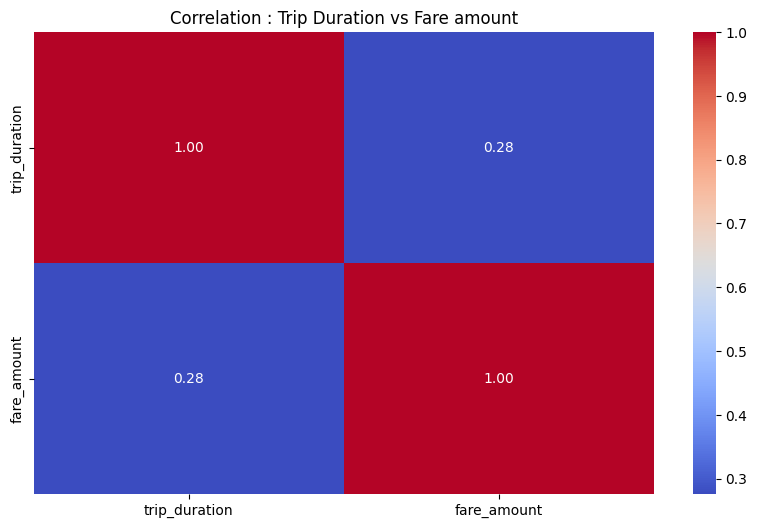

In [271]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_dist[['trip_duration', 'fare_amount']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation : Trip Duration vs Fare amount')
plt.show()

In [ ]:
Scatter plot shows weak correlation betwen Trip duraton and Fare amount. 
Its not neccessary that with increased duration every time the fare also goes up. 
There are instances where the trip duration has increased but fare remains low and vice versa. There is no clear pattern here. 
Coorelation coefficient for these varaibles is 0.28- Weak positive correlation.


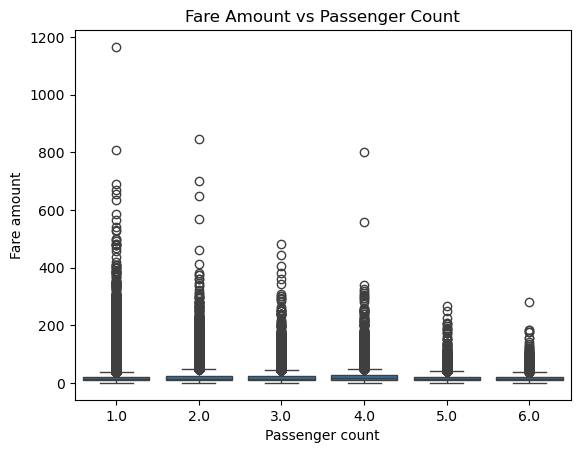

In [169]:
# Show relationship between fare and number of passengers

sns.boxplot(x='passenger_count', y='fare_amount', data=df_dist)
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger count')
plt.ylabel('Fare amount')
plt.show()

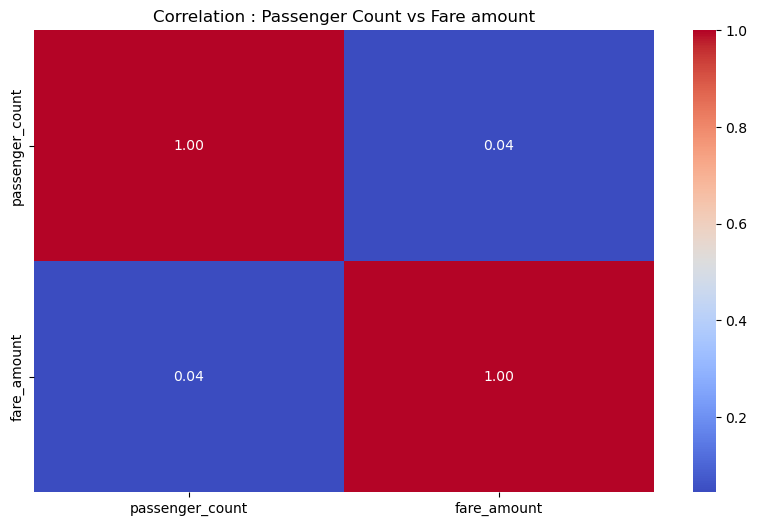

In [279]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_dist[['passenger_count', 'fare_amount']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation : Passenger Count vs Fare amount')
plt.show()

Most no of trip are with 1, 2 or 3 passenger count. Median remains largely same despite varying passenger count signifying no obvious relation.
Too many outlier >> all categories ( count of passengers )have most of the values above the upper whiskers.
Weak corelation coefficient of nearly `0(0.04)` underlining the fact that there is no bearing on the fare amount despite varying passenger count. 


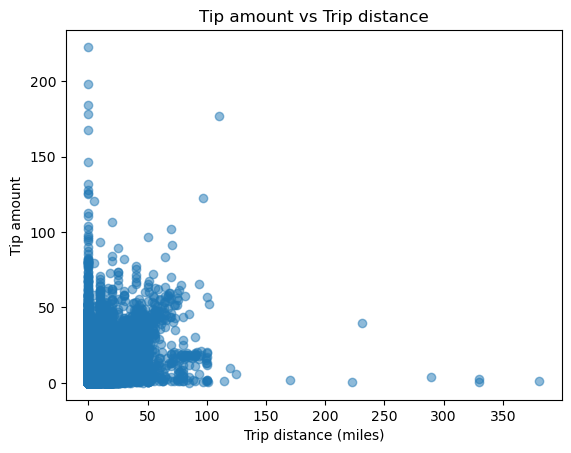

In [171]:
# Show relationship between tip and trip distance
plt.scatter(df_dist.tip_amount, df_dist.trip_distance, alpha=0.5)
plt.title('Tip amount vs Trip distance')
plt.xlabel('Trip distance (miles)')
plt.ylabel('Tip amount')
plt.show()

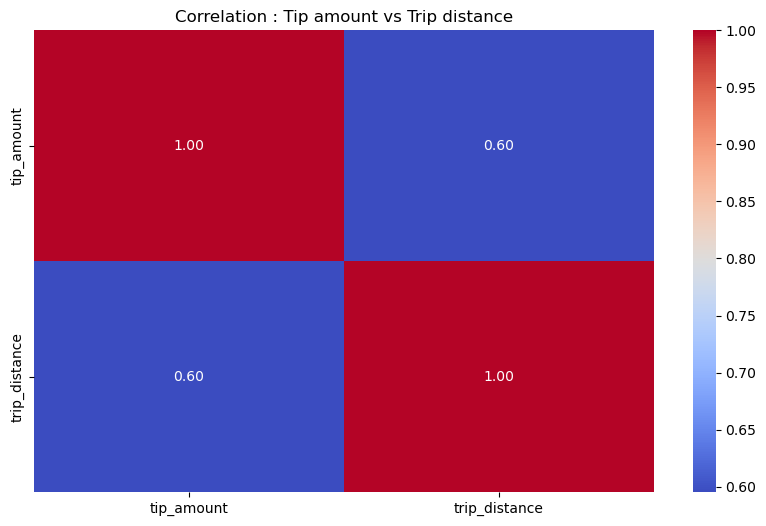

In [173]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_dist[['tip_amount', 'trip_distance']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation : Tip amount vs Trip distance')
plt.show()

There is a moderately positive corelation between these two variables. They seem to be low for shorter trip and there is a slight upward 
    spiral on the scatter plot which shows there can be some correlation . However there seems to be lot of outliers suggesting not everytime a longer 
    trip needs to be tipped generously or vice versa. Corelation coefficient of `0.6` as shown in the heatmap also suggest moderate correlation suggesting there can be 
    other variables that could also play in while passenger consider tipping and only trip distance cant be signularly considered for analysis. 
p    However the corelation is good to establish the pattern that  on an average a customer would tend to 
        tip low for shorter trips and higher for longer trips. 

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [175]:
# Analyse the distribution of different payment types (payment_type).
print(df_dist.payment_type.unique())
pattern=100*df_dist.payment_type.value_counts(normalize=True)
print(pattern)

[1 2 3 4]
payment_type
1    82.142145
2    16.929884
4     0.611433
3     0.316539
Name: proportion, dtype: float64


In [177]:
payment_name = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute'}

/var/folders/p3/2hr4fjln27j60318qhkz2j1m0000gn/T/ipykernel_41852/3020687762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['payment_names'] = df_dist['payment_type'].replace(payment_name)


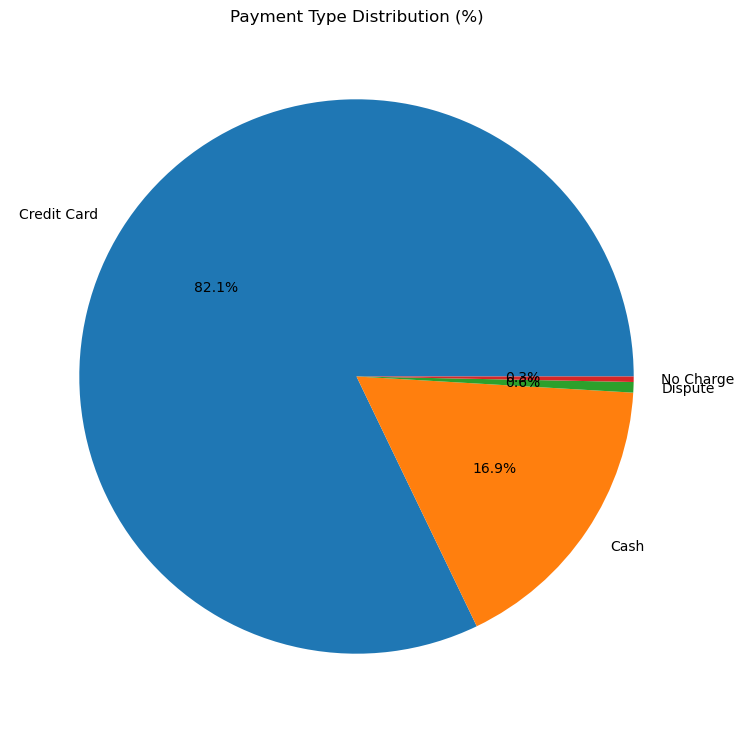

In [179]:
df_dist['payment_names'] = df_dist['payment_type'].replace(payment_name)
pattern=100*df_dist.payment_names.value_counts(normalize=True)
#print(pattern)
plt.figure(figsize=(12, 9))
plt.pie(pattern.values,labels=pattern.index,autopct='%1.1f%%')
plt.title('Payment Type Distribution (%)', fontsize=12)
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [384]:
print("matplotlib version:", plt.matplotlib.__version__)

matplotlib version: 3.10.0


In [2]:
 #!pip install geopandas


  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyogrio-0.10.0-cp312-cp312-macosx_12_0_x86_64.whl.metadata (5.5 kB)
  Using cached pyproj-3.7.1.tar.gz (226 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      proj executable not found. Please set the PROJ_DIR variable. For more information see: https://pyproj4.github.io/pyproj/stable/installation.html
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [376]:
 !pip install geopandas # done through terminal


In [181]:
import geopandas as gpd
print("GeoPandas version:", gpd.__version__)

GeoPandas version: 1.0.1


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [183]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("/Users/divyanair/Documents/Upgrad Folder/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...  
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....  
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...  
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...  
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

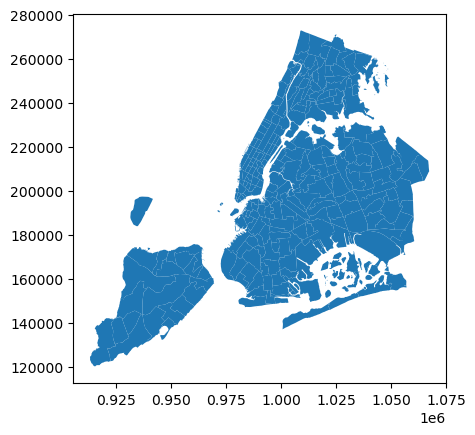

In [185]:
print(zones.info())
zones.plot()


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [187]:
# Merge zones and trip records using locationID and PULocationID

df_merge = df_dist.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).rename(columns={'zone': 'PU_zone', 'borough': 'PU_borough'})

In [191]:
#performing the same for DOLocationID too
df_merge = df_merge.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='DOLocationID', 
    right_on='LocationID',     
    how='left'
).rename(columns={'zone': 'DO_zone', 'borough': 'DO_borough'})


In [193]:
df_merge.head(1)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:31:10   2023-12-01 00:35:37              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.1         1.0                  N           238           236   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          7.9    1.0      0.5        1.94           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         14.84                   2.5          0.0   

   pickup_hour pickup_day pickup_month pickup_quarter  trip_duration  \
0            0     Friday     December         2023Q4           4.45   

  payment_names  LocationID_x                PU_zone PU_borough  LocationID_y  \
0   Credit Card         238.0  Upper West Side North  Manhattan         236.0   

                 DO_zone DO_borough  
0  Upper East Side North  Manhattan

In [195]:
df_merge.shape

(1709905, 31)

In [197]:
df_merge.shape #(1710769, 30)

(1709905, 31)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [199]:
# Group data by location and calculate the number of trips
zone_trip_counts = df_merge.groupby('PU_zone').size().sort_values(ascending=False)
print(zone_trip_counts.head())
print(zone_trip_counts.shape)


PU_zone
JFK Airport              93197
Midtown Center           81583
Upper East Side South    78030
Upper East Side North    68482
Midtown East             62958
dtype: int64
(244,)


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [203]:
# Merge trip counts back to the zones GeoDataFrame
zone_trip_counts = zone_trip_counts.reset_index(name='trip_count')
zones_new = zones.merge(zone_trip_counts,how='left',left_on='zone',right_on='PU_zone')



In [205]:
zones_new.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...   
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....   
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...   
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...   
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...   

                   PU_zone  trip_count  
0           Newark Airport        12.0  
1              Jamaica Bay         2.0  
2  Allerton/Pelham Gardens         3.0  
3            Alphabet City      1740.0  
4                      NaN         NaN

In [207]:
zones_new.shape

(263, 9)

In [209]:
zones_new.isnull().sum()

OBJECTID       0
Shape_Leng     0
Shape_Area     0
zone           0
LocationID     0
borough        0
geometry       0
PU_zone       18
trip_count    18
dtype: int64

In [118]:
zones_new.trip_count= zones_new.trip_count.fillna(0)

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

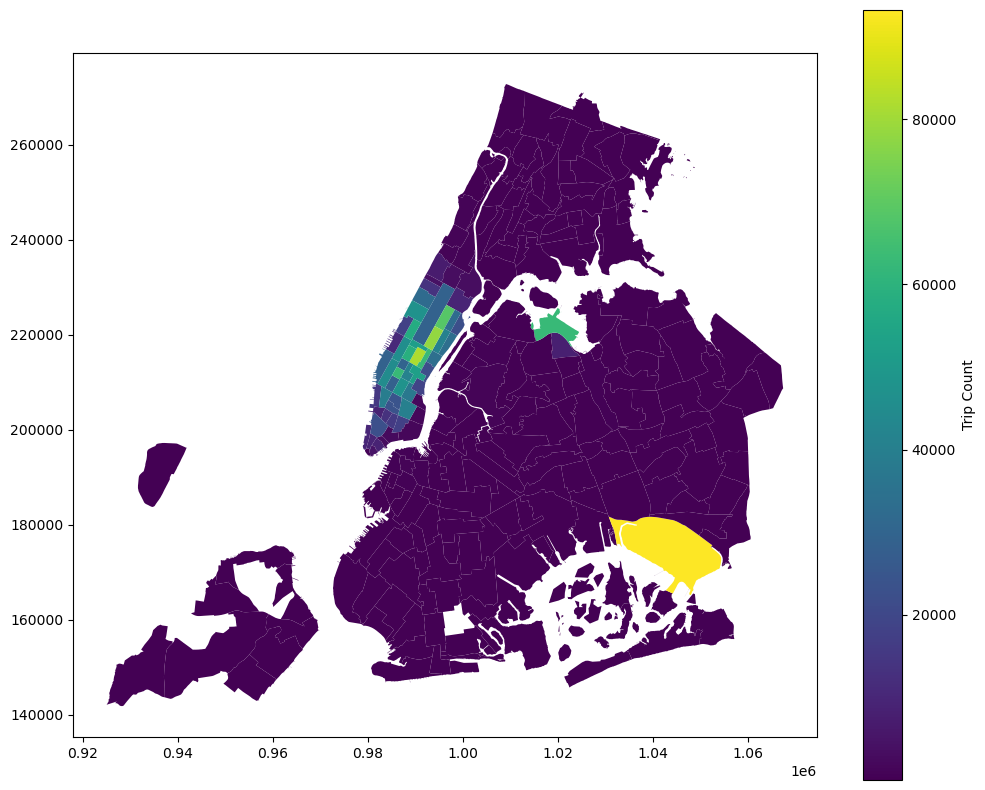

In [211]:
# Define figure and axis
ig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_new.plot(
    column = 'trip_count',
    ax = ax,
    legend = True,
    legend_kwds = {
        'label': "Trip Count",
        'orientation': "vertical"
    }
)
plt.show()

In [213]:
# can you try displaying the zones DF sorted by the number of trips?

top_zones = zones_new.sort_values(by='trip_count', ascending=False)
top_zones.head(20)[['zone']]

zone
131                   JFK Airport
160                Midtown Center
236         Upper East Side South
235         Upper East Side North
161                  Midtown East
185  Penn Station/Madison Sq West
137             LaGuardia Airport
229     Times Sq/Theatre District
141           Lincoln Square East
169                   Murray Hill
162                 Midtown North
233                      Union Sq
238         Upper West Side South
47                   Clinton East
67                   East Chelsea
163                 Midtown South
140               Lenox Hill West
78                   East Village
248                  West Village
106                      Gramercy

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
  ### Temporal Trends:

  1) Most pickups occur between **3 PM to 8PM** and the **peak hour** is usually at **6PM*
  2) **Busiest days** of the week is **Wednesdays and Thursday** (peak mid week activity).
  3) **Monday and Sunday** are the days with **least pickups** attributing to winding weekend and remote work on Monday.
  4) Weekends are steadier but the demands not higher than mid week.
  5) **Lowest number of pickups** are in the month of **Aug and September** attributing to summer holidays when people are out of city vacationing and less workdays in Septemeber.
  6) **May ,October and March( in that order)** has **highest pickups**.**May(Spring), March(end of winters,spring break) and October (start of fall)** have pleasant weather and contributes to tourism footfall.
  7) The **increase/peak** could thus be attributed to **pleasant weather**.

* Trends in revenue collected
   ### Monthly revenue trends:

 1) Pick up volume drives revenue collection.
 2) **May** and **October** do the  **highest monthly revenues** with more than **$4.6 million**.
 3) **March, April, and June**, follows the season trend and generates over **$4.3M** in revenue.
 4) Revenue **drops in Summer** i.e. **July , August and September** and again in **winters** i,e **January and February**.

* Trends in quarterly revenue
    ### Quarterly revenue trends

 1) Q2 (Apr–Jun) and Q4 (Oct–Dec) has the largest share of revenue both amounting to 26.8%
 2) Q1 (Jan–Mar) brought in 23.7% — despite February being lowest month. March has been an outstanding month as far as trip counts are concerned. This drove the revenue generation to a close second.
 3) July to Sep is where the revenue generation dips and this shows off with Q2 fairing with 22.7%

### OBSERVATION :Seasons,holdiays and tourist footfalls drives both trip counts, commute behaviour and subsequent revenue generation.

* How fare depends on trip distance, trip duration and passenger counts
     ### Fare Correlation
    1) Fare amount has a very strong positive correlation with trip distance, increasing lineraly with trip distance. Trip distance stands out as the most impactful factor on  fare.
    2) Trip Duration as per the graph shows a weak yet positive corelation. There is some increase in fare as the duration goes up but cant be concluded for all cases possibly with other factors like waiting time, airport visits and traffic.Hence doesnt stand out as an influential variable to analyse variation in fare amount.
    3) Passenger count has no correlation with fare amount and its median remains fairly same across all passenger counts.This only shows that fare is charged for a trip and not on the no of people taking the trip.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [215]:

print(df_merge.trip_distance.min())
print(df_merge.trip_duration.min())


0.01
0.016666666666666666


In [252]:
df_merge.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'pickup_quarter',
 'trip_duration',
 'payment_names',
 'LocationID',
 'PU_zone',
 'PU_borough']

In [126]:
df_merge.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'pickup_quarter',
 'trip_duration',
 'payment_names',
 'PU_zone',
 'PU_borough',
 'Speed',
 'LocationID',
 'DO_zone',
 'DO_borough']

In [272]:
df_merge.PULocationID.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1709905 entries, 0 to 1709904
Series name: PULocationID
Non-Null Count    Dtype
--------------    -----
1709905 non-null  int64
dtypes: int64(1)
memory usage: 13.0 MB


In [217]:
df_merge.trip_duration.describe().round(2)

count    1709905.00
mean          17.84
std           41.51
min            0.02
25%            8.12
50%           12.98
75%           20.90
max         3726.97
Name: trip_duration, dtype: float64

In [219]:
df_merge['speed']=df_merge.trip_distance/ df_merge.trip_duration #column speed in miles per minute

In [221]:
df_merge['Speed_mph'] = df_merge.trip_distance/ (df_merge.trip_duration / 60) #trying to get output in mph

In [132]:

df_merge.to_parquet("df_merge.parquet", index=False)

In [76]:
df_merge=pd.read_parquet('/Users/divyanair/Documents/Upgrad Folder/Documents/Upgrad Folder/df_merge.parquet')

In [223]:
print(df_merge.PU_zone.info())
print(df_merge.DO_zone.info())

<class 'pandas.core.series.Series'>
RangeIndex: 1709905 entries, 0 to 1709904
Series name: PU_zone
Non-Null Count    Dtype 
--------------    ----- 
1706450 non-null  object
dtypes: object(1)
memory usage: 13.0+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 1709905 entries, 0 to 1709904
Series name: DO_zone
Non-Null Count    Dtype 
--------------    ----- 
1698979 non-null  object
dtypes: object(1)
memory usage: 13.0+ MB
None


In [225]:
df_merge['route_name'] = df_merge.PU_zone + ' → ' + df_merge.DO_zone

In [227]:
df_merge.route_name.shape

(1709905,)

In [229]:
# Find routes which have the slowest speeds at different times of the day
hourly_speed=df_merge.groupby(['route_name', 'pickup_hour'])['speed'].mean().reset_index()

In [231]:
# Find routes which have the slowest speeds at different times of the day
hourly_speed_mph=df_merge.groupby(['route_name', 'pickup_hour'])['Speed_mph'].mean().reset_index()

In [233]:
hourly_speed.max()

route_name     Yorkville West → Yorkville East
pickup_hour                                 23
speed                                    25.62
dtype: object

In [235]:
hourly_speed_mph.max()

route_name     Yorkville West → Yorkville East
pickup_hour                                 23
Speed_mph                               1537.2
dtype: object

In [237]:
slow_sort_hrly= hourly_speed.sort_values(by=['pickup_hour', 'speed']).groupby('pickup_hour').first().reset_index()
slow_sort_hrly.head(24)

pickup_hour                                         route_name     speed
0             0     South Williamsburg → Williamsburg (South Side)  0.000441
1             1                         Red Hook → Carroll Gardens  0.007595
2             2                Yorkville East → Soundview/Bruckner  0.004831
3             3  Meatpacking/West Village West → Morningside He...  0.004826
4             4                    Midtown South → Jackson Heights  0.004564
5             5                        Elmhurst/Maspeth → Woodside  0.025245
6             6                              Midtown East → Corona  0.000170
7             7                          Steinway → Pelham Parkway  0.008724
8             8                  UN/Turtle Bay South → Parkchester  0.007595
9             9              Queensbridge/Ravenswood → JFK Airport  0.004613
10           10                           East Elmhurst → Woodside  0.002967
11           11             Battery Park → Greenwich Village South  0.002009
12           12     Saint Michaels Cemetery/Woodside → JFK Airport  0.000007
13           13           Hamilton Heights → Van Cortlandt Village  0.004253
14           14       East Village → Long Island City/Queens Plaza  0.001690
15           15  Penn Station/Madison Sq West → Queensbridge/Ra...  0.000143
16           16                World Trade Center → Manhattanville  0.001307
17           17                Battery Park City → Windsor Terrace  0.000748
18           18          Williamsburg (South Side) → Midtown South  0.003299
19           19               Elmhurst/Maspeth → LaGuardia Airport  0.000194
20           20                   Yorkville East → Jackson Heights  0.003911
21           21                       Lenox Hill East → Greenpoint  0.002262
22           22  Greenwich Village North → University Heights/M...  0.000802
23           23                                Gowanus → Flatlands  0.000217

In [239]:
slow_sort_hrly_mph= hourly_speed_mph.sort_values(by=['pickup_hour', 'Speed_mph']).groupby('pickup_hour').first().reset_index()
slow_sort_hrly_mph.head(24)

pickup_hour                                         route_name  Speed_mph
0             0     South Williamsburg → Williamsburg (South Side)   0.026473
1             1                         Red Hook → Carroll Gardens   0.455696
2             2                Yorkville East → Soundview/Bruckner   0.289855
3             3  Meatpacking/West Village West → Morningside He...   0.289555
4             4                    Midtown South → Jackson Heights   0.273811
5             5                        Elmhurst/Maspeth → Woodside   1.514727
6             6                              Midtown East → Corona   0.010221
7             7                          Steinway → Pelham Parkway   0.523449
8             8                  UN/Turtle Bay South → Parkchester   0.455723
9             9              Queensbridge/Ravenswood → JFK Airport   0.276793
10           10                           East Elmhurst → Woodside   0.178009
11           11             Battery Park → Greenwich Village South   0.120551
12           12     Saint Michaels Cemetery/Woodside → JFK Airport   0.000394
13           13           Hamilton Heights → Van Cortlandt Village   0.255159
14           14       East Village → Long Island City/Queens Plaza   0.101394
15           15  Penn Station/Madison Sq West → Queensbridge/Ra...   0.008573
16           16                World Trade Center → Manhattanville   0.078411
17           17                Battery Park City → Windsor Terrace   0.044888
18           18          Williamsburg (South Side) → Midtown South   0.197910
19           19               Elmhurst/Maspeth → LaGuardia Airport   0.011611
20           20                   Yorkville East → Jackson Heights   0.234665
21           21                       Lenox Hill East → Greenpoint   0.135709
22           22  Greenwich Village North → University Heights/M...   0.048105
23           23                                Gowanus → Flatlands   0.013040

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

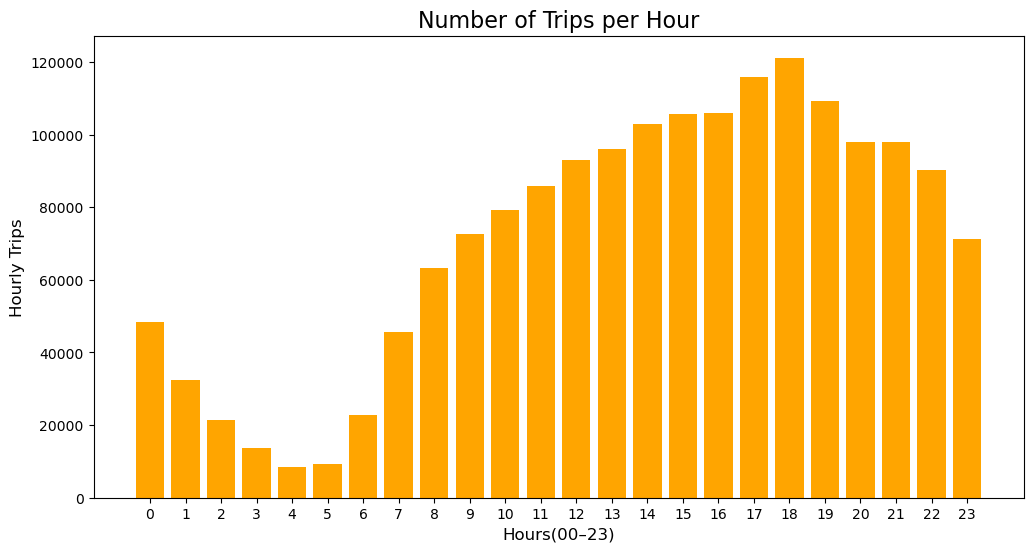

In [241]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trip = df_merge.pickup_hour.value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(hourly_trip.index, hourly_trip.values,color='orange')
plt.title("Number of Trips per Hour", fontsize=16)
plt.xticks(range(0, 24))
plt.xlabel("Hours(00–23)", fontsize=12)
plt.ylabel("Hourly Trips", fontsize=12)
plt.show()


### Busiest hours is `1800hrs (6pm)` with over `120k trips`.

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [243]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.05
hourly_trip_scaled=hourly_trip / sample_fraction
#print(hourly_trip_scaled)



In [245]:
for hour, count in hourly_trip_scaled.items():
    print(f"Hour {hour:02d}: Trip Count for Scaled data set is {count:,} trips")

Hour 00: Trip Count for Scaled data set is 967,660.0 trips
Hour 01: Trip Count for Scaled data set is 648,160.0 trips
Hour 02: Trip Count for Scaled data set is 426,160.0 trips
Hour 03: Trip Count for Scaled data set is 275,760.0 trips
Hour 04: Trip Count for Scaled data set is 170,480.0 trips
Hour 05: Trip Count for Scaled data set is 184,540.0 trips
Hour 06: Trip Count for Scaled data set is 453,100.0 trips
Hour 07: Trip Count for Scaled data set is 911,960.0 trips
Hour 08: Trip Count for Scaled data set is 1,266,820.0 trips
Hour 09: Trip Count for Scaled data set is 1,449,520.0 trips
Hour 10: Trip Count for Scaled data set is 1,586,460.0 trips
Hour 11: Trip Count for Scaled data set is 1,715,240.0 trips
Hour 12: Trip Count for Scaled data set is 1,857,180.0 trips
Hour 13: Trip Count for Scaled data set is 1,921,360.0 trips
Hour 14: Trip Count for Scaled data set is 2,059,700.0 trips
Hour 15: Trip Count for Scaled data set is 2,115,140.0 trips
Hour 16: Trip Count for Scaled data set 

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [247]:
# Compare traffic trends for the week days and weekends
df_merge.columns



Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day', 'pickup_month', 'pickup_quarter', 'trip_duration',
       'payment_names', 'LocationID_x', 'PU_zone', 'PU_borough',
       'LocationID_y', 'DO_zone', 'DO_borough', 'speed', 'Speed_mph',
       'route_name'],
      dtype='object')

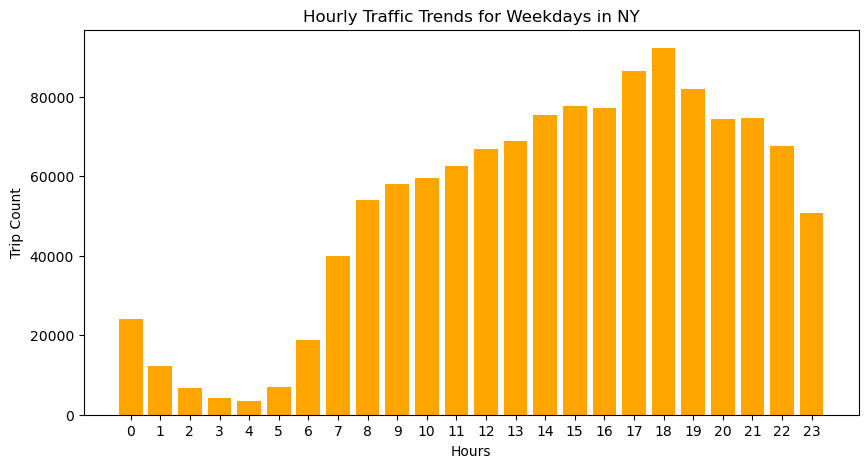

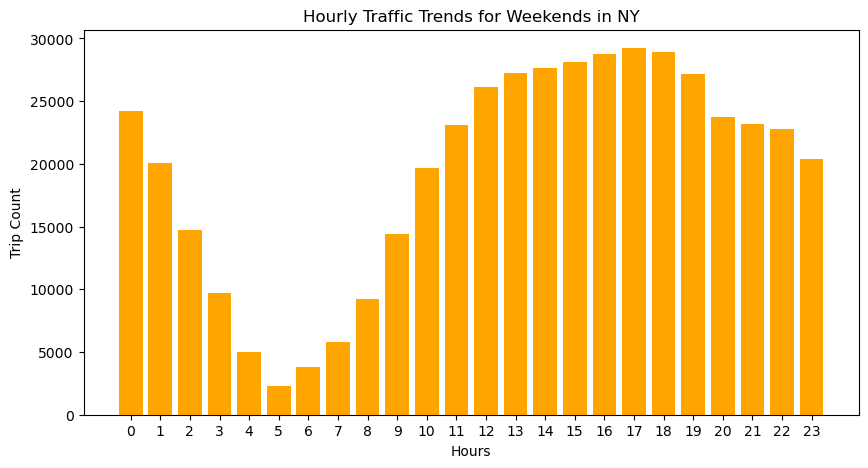

In [249]:
weekday = df_merge[df_merge.pickup_day.isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekend = df_merge[df_merge.pickup_day.isin(['Saturday', 'Sunday'])]
weekday_trip = weekday.pickup_hour.value_counts().sort_index()
weekend_trip = weekend.pickup_hour.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(weekday_trip.index, weekday_trip.values, color='orange')
plt.title('Hourly Traffic Trends for Weekdays in NY')
plt.xlabel('Hours')
plt.ylabel('Trip Count')
plt.xticks(range(24))
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(weekend_trip.index, weekend_trip.values, color='orange')
plt.title('Hourly Traffic Trends for Weekends in NY')
plt.xlabel('Hours')
plt.ylabel('Trip Count')
plt.xticks(range(24))
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?
### ANSWER: 
Mornings surge starts from 7pm onwards on a weekday as compared to weekends. Weekends comparable surge starts only by 10am. 
Similarly evenings also see a surge around 5-7pm overlapping with office leaving hours.For Weekends the count of trips is relatively steady through the day and lower than that of weekday. 
Nights(10pm -3am) are busier in Weekends whereas quieter in weekdays after 11pm. 

How will this help ? 
Help with fleet management, provisioning more drivers around surge time and nt having more drivers during queiter hours, 
Also it helps deciding strategy for surge prices which aids in revenue generation
Ensuring enough driver availabilty in peak hours ensure less wait time and happy customers.
NY can use this to understand traffic movement in the city. 

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

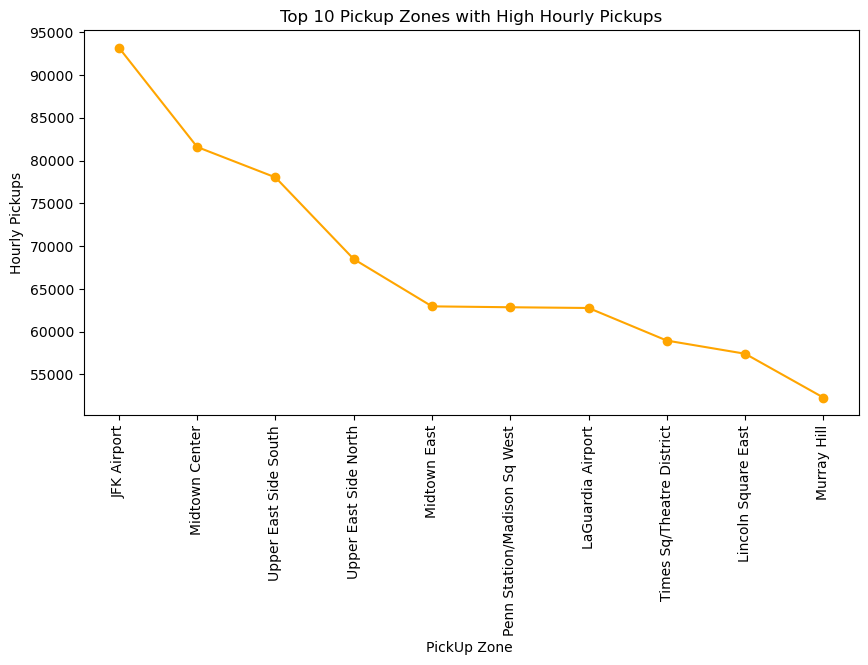

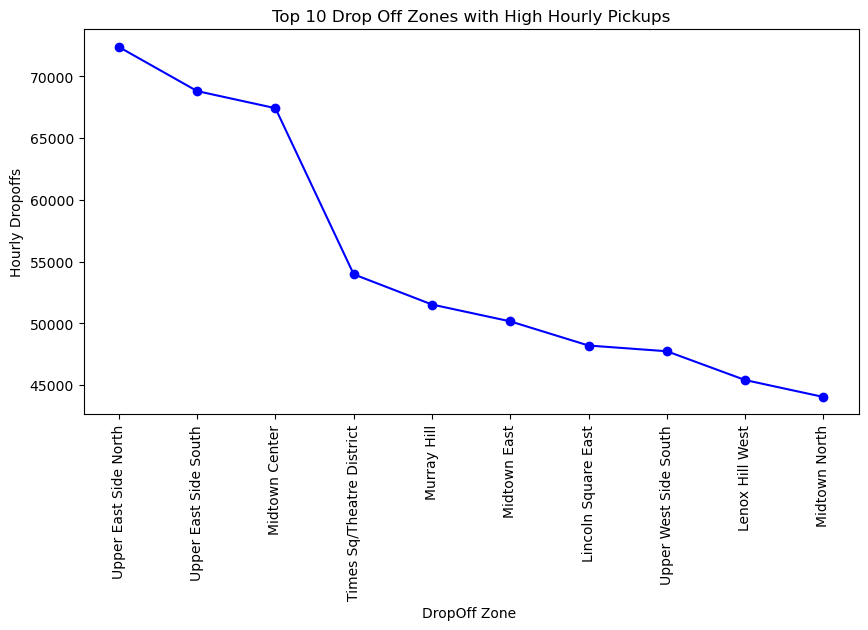

In [253]:
# Find top 10 pickup and dropoff zones
#PickupZones and grouping top 10
pickup_zones = df_merge.groupby(["PU_zone", "pickup_hour"]).size().reset_index(name="trip_count")
top_10_zonesP = pickup_zones.groupby("PU_zone")["trip_count"].sum().nlargest(10).reset_index()
#DropOffZones and grouping top 10
dropoff_zones = df_merge.groupby(["DO_zone", "pickup_hour"]).size().reset_index(name="trip_count")
top_10_zonesD = dropoff_zones.groupby("DO_zone")["trip_count"].sum().nlargest(10).reset_index()

#LinePlot for Pick up
plt.figure(figsize=(10,5))
plt.plot(top_10_zonesP["PU_zone"].astype(str), top_10_zonesP["trip_count"], color="orange",marker='o')
plt.xlabel("PickUp Zone ")
plt.ylabel("Hourly Pickups")
plt.title("Top 10 Pickup Zones with High Hourly Pickups")
plt.xticks(rotation=90)
plt.show()

#Line PLot for Dropoff
plt.figure(figsize=(10,5))
plt.plot(top_10_zonesD["DO_zone"].astype(str), top_10_zonesD["trip_count"], color="blue",marker='o')
plt.xlabel("DropOff Zone ")
plt.ylabel("Hourly Dropoffs")
plt.title("Top 10 Drop Off Zones with High Hourly Pickups")
plt.xticks(rotation=90)
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [441]:
df_merge.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'pickup_quarter',
 'trip_duration',
 'payment_names',
 'PU_zone',
 'PU_borough',
 'Speed',
 'DO_zone',
 'DO_borough',
 'route_name',
 'speed',
 'Speed_mph']

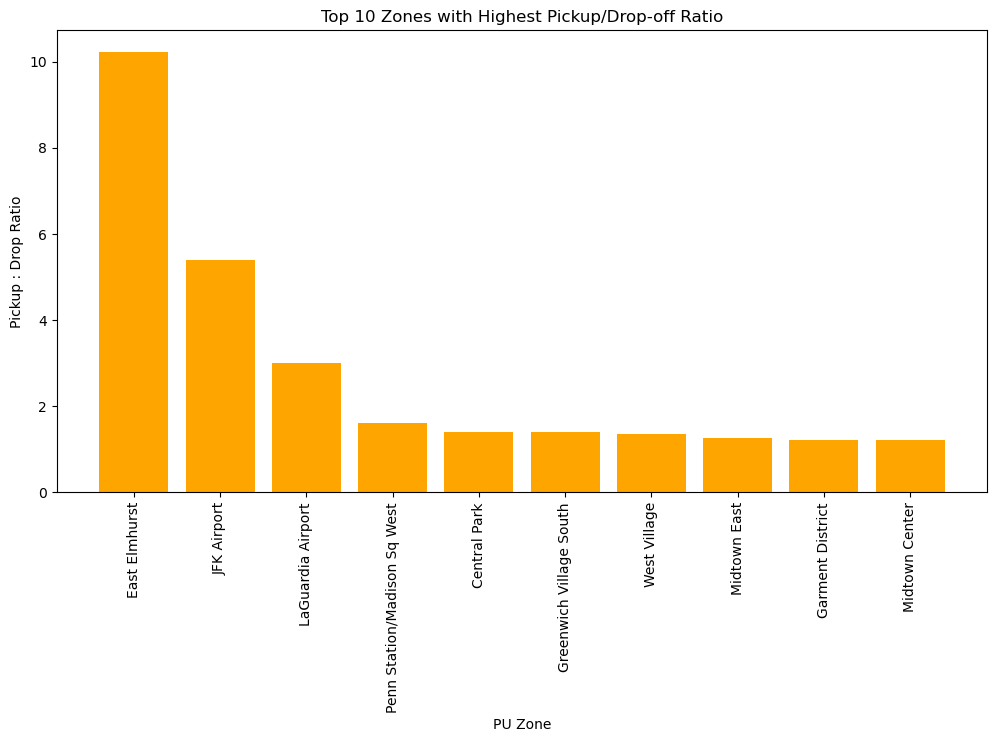

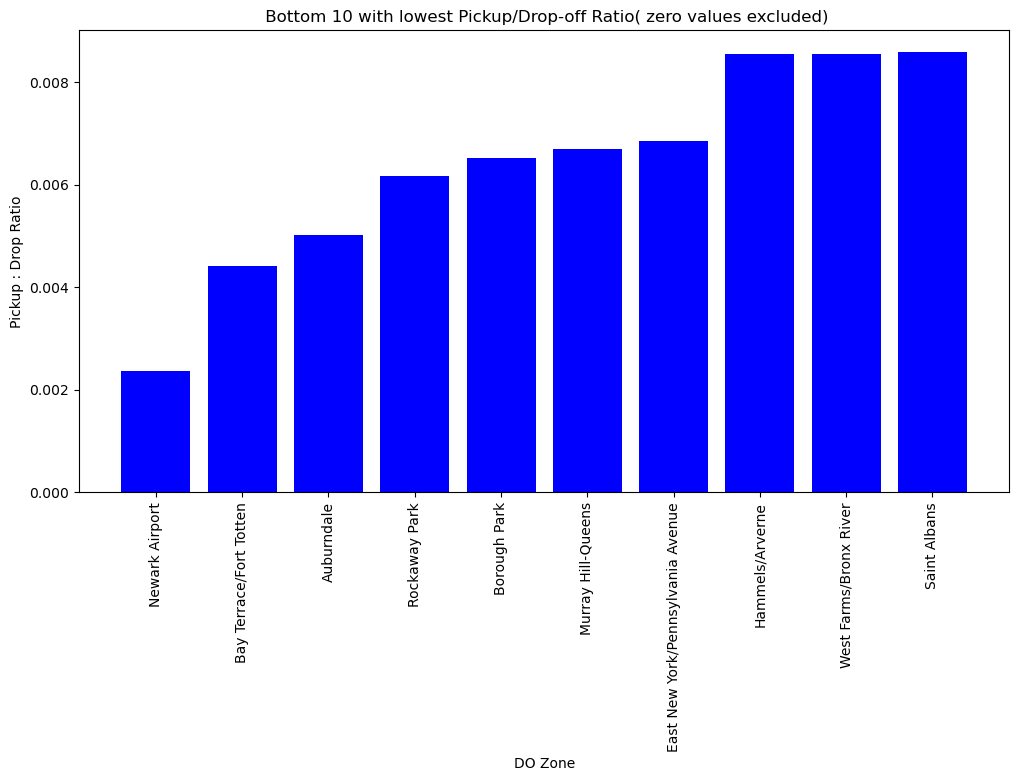

In [255]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df_merge.PU_zone.value_counts().rename("pickup_count")
dropoff_counts = df_merge.DO_zone.value_counts().rename("dropoff_count")

zone_count = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

zone_count["pick_drop_ratio"] = zone_count["pickup_count"] / (zone_count["dropoff_count"] + 1)

top_10_zones = zone_count.nlargest(10, "pick_drop_ratio")

non_zero_zones = zone_count[zone_count["pick_drop_ratio"] > 0]
bottom_10_zones = non_zero_zones.nsmallest(10, "pick_drop_ratio")

plt.figure(figsize=(12,6))
plt.bar(top_10_zones.index.astype(str), top_10_zones["pick_drop_ratio"], color="orange")
plt.xlabel("PU Zone")
plt.ylabel("Pickup : Drop Ratio")
plt.title("Top 10 Zones with Highest Pickup/Drop-off Ratio")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(bottom_10_zones.index.astype(str), bottom_10_zones["pick_drop_ratio"], color="blue")
plt.xlabel("DO Zone")
plt.ylabel("Pickup : Drop Ratio")
plt.title(" Bottom 10 with lowest Pickup/Drop-off Ratio( zero values excluded)")
plt.xticks(rotation=90)
plt.show()



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [257]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = df_merge[(df_merge.pickup_hour >= 23) | (df_merge.pickup_hour <= 5)]

# Step 3: Count pickups and dropoffs during night
night_pickups = night_hours.PU_zone.value_counts().head(10)
night_dropoffs = night_hours.DO_zone.value_counts().head(10)
print(night_dropoffs)
print(night_pickups)

DO_zone
East Village                 7346
Clinton East                 6334
Murray Hill                  5925
Gramercy                     5527
East Chelsea                 5394
Lenox Hill West              5064
Yorkville West               4894
West Village                 4630
Times Sq/Theatre District    4428
Flatiron                     4275
Name: count, dtype: int64
PU_zone
East Village                    14557
JFK Airport                     14434
West Village                    12114
Clinton East                     9808
Lower East Side                  9363
Greenwich Village South          8614
Times Sq/Theatre District        7931
Penn Station/Madison Sq West     6752
LaGuardia Airport                6062
Midtown South                    5960
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [259]:
# Filter for night hours (11 PM to 5 AM)
night_revenue = night_hours.total_amount.sum()
night_revenue

6095572.910000001

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [261]:
# Analyse the fare per mile per passenger for different passenger counts

#filter for valid values 
df_filter = df_merge[(df_merge['trip_distance'] >= 1) & (df_merge['passenger_count'] >= 1)]

#Compute unit price per mile per passenger
df_filter['unit_fare_perperson']=df_filter.fare_amount / (df_filter.trip_distance* df_filter.passenger_count)


/var/folders/p3/2hr4fjln27j60318qhkz2j1m0000gn/T/ipykernel_41852/2643882074.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['unit_fare_perperson']=df_filter.fare_amount / (df_filter.trip_distance* df_filter.passenger_count)


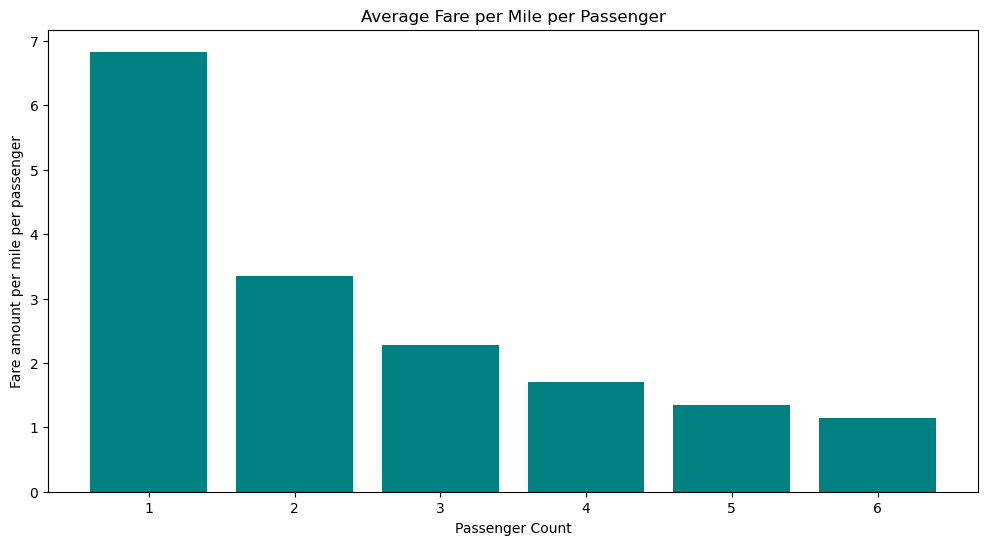

In [263]:

#Grouping the passenger count and finding average unit fare amount for visualization
passenger_unitfareamount = (df_filter.groupby('passenger_count')['unit_fare_perperson'].mean().reset_index().sort_values(by='passenger_count'))

#plot a bar to analyse
plt.figure(figsize=(12, 6))
plt.bar(passenger_unitfareamount['passenger_count'], passenger_unitfareamount['unit_fare_perperson'], color='teal')

plt.title('Average Fare per Mile per Passenger', fontsize=12)
plt.xlabel('Passenger Count')
plt.ylabel('Fare amount per mile per passenger')
plt.xticks(passenger_unitfareamount.passenger_count)
plt.show()

Analysis: Fare amount per mile per passenger decreases with increase in passenger count. Fare amount burdens when it has to be paid by one person as compared to when its paid by 2 or more persons. Return of value per passenger is not as sharp when passenger count is 4 or more as compared to passenger count =2 or 3 .


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [265]:
# Compare the average fare per mile for different days and for different times of the day
df_filter['unit_fare']=df_filter.fare_amount / df_filter.trip_distance
fare_by_hour = (df_filter.groupby('pickup_hour')['unit_fare'].mean().reset_index().sort_values(by='pickup_hour'))
weekday_axis =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_days = (df_filter.groupby('pickup_day')['unit_fare'].mean().reindex(weekday_axis).reset_index())


/var/folders/p3/2hr4fjln27j60318qhkz2j1m0000gn/T/ipykernel_41852/3796715099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['unit_fare']=df_filter.fare_amount / df_filter.trip_distance


In [267]:
# Compare the average fare per mile for different days and for different times of the day
fare_by_hour = (df_filter.groupby('pickup_hour')['unit_fare'].mean().reset_index().sort_values(by='pickup_hour'))
weekday_axis =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_days = (df_filter.groupby('pickup_day')['unit_fare'].mean().reindex(weekday_axis).reset_index())


In [269]:
fare_by_days


pickup_day  unit_fare
0     Monday   6.506512
1    Tuesday   7.004411
2  Wednesday   7.107811
3   Thursday   7.102541
4     Friday   6.848130
5   Saturday   6.738204
6     Sunday   6.222971

In [54]:
fare_by_hour

pickup_hour  unit_fare
0             0   5.841436
1             1   5.787552
2             2   5.731290
3             3   5.599842
4             4   5.288972
5             5   5.160010
6             6   5.505299
7             7   6.164710
8             8   6.767028
9             9   7.000183
10           10   7.117414
11           11   7.342375
12           12   7.394030
13           13   7.288858
14           14   7.302302
15           15   7.361376
16           16   7.288794
17           17   7.342910
18           18   7.155911
19           19   6.785036
20           20   6.418878
21           21   6.275853
22           22   6.176290
23           23   5.970376

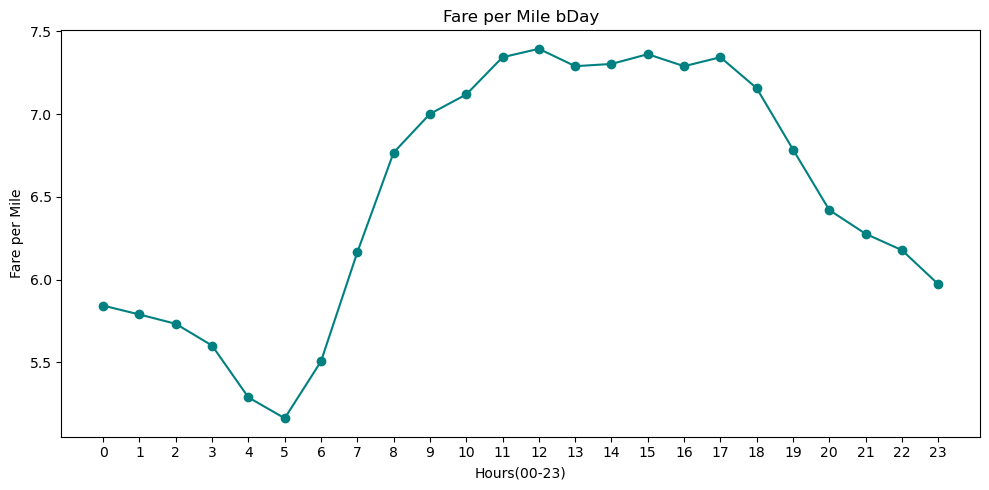

In [271]:
plt.figure(figsize=(10, 5))
plt.plot(fare_by_hour['pickup_hour'], fare_by_hour['unit_fare'], marker='o', color='teal')
plt.title('Fare per Mile bDay')
plt.xlabel('Hours(00-23)')
plt.ylabel('Fare per Mile')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

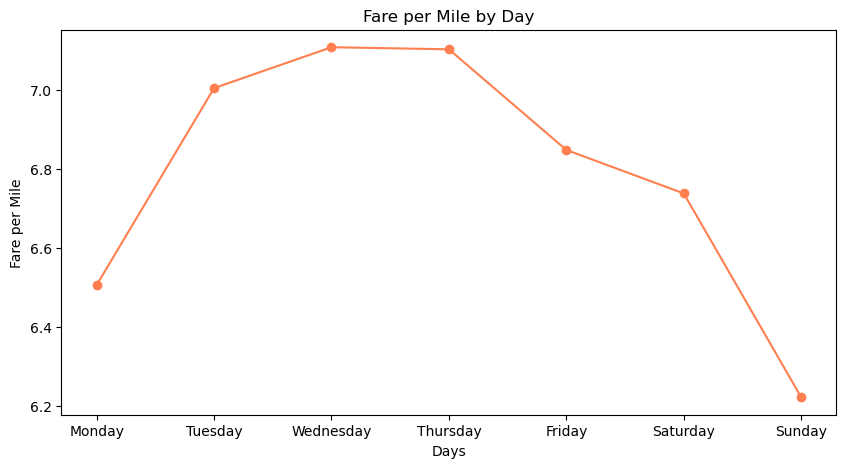

In [273]:
plt.figure(figsize=(10, 5))
plt.plot(fare_by_days['pickup_day'], fare_by_days['unit_fare'], marker='o', color='coral')
plt.title('Fare per Mile by Day')
plt.xlabel('Days')
plt.ylabel('Fare per Mile')
plt.show()

In [4]:
import os
os.getcwd()

'/Users/divyanair'

In [521]:
os.chdir('/Users/divyanair/Documents/Upgrad Folder')

In [2]:
os.getcwd()

NameError: name 'os' is not defined

In [535]:
df_filter.to_parquet("df_filter.parquet", index=False)

In [537]:
df_filter.to_csv("df_filter.csv", index=False)

In [24]:
df_filter=pd.read_parquet("df_filter.parquet")

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [275]:
UniqueVendorID=df_filter.VendorID.unique()
UniqueVendorID

array([2, 1])

In [277]:
# Compare fare per mile for different vendors

VendorFarePerMile = df_filter.groupby('VendorID')['unit_fare'].mean().reset_index()
VendorFarePerMile


VendorID  unit_fare
0         1   6.835923
1         2   6.800490

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [279]:
# Defining distance tiers
def distance_tier(dist):
    if dist <= 2:
        return '0–2 miles'
    elif dist <= 5:
        return '2–5 miles'
    else:
        return '>5 miles'

df_filter['distance_tier'] = df_filter.trip_distance.apply(distance_tier)
distance_tier_fare= (df_filter.groupby(['VendorID', 'distance_tier'])['unit_fare'].mean().reset_index().sort_values(by=['distance_tier', 'VendorID']))


/var/folders/p3/2hr4fjln27j60318qhkz2j1m0000gn/T/ipykernel_41852/1086140930.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['distance_tier'] = df_filter.trip_distance.apply(distance_tier)


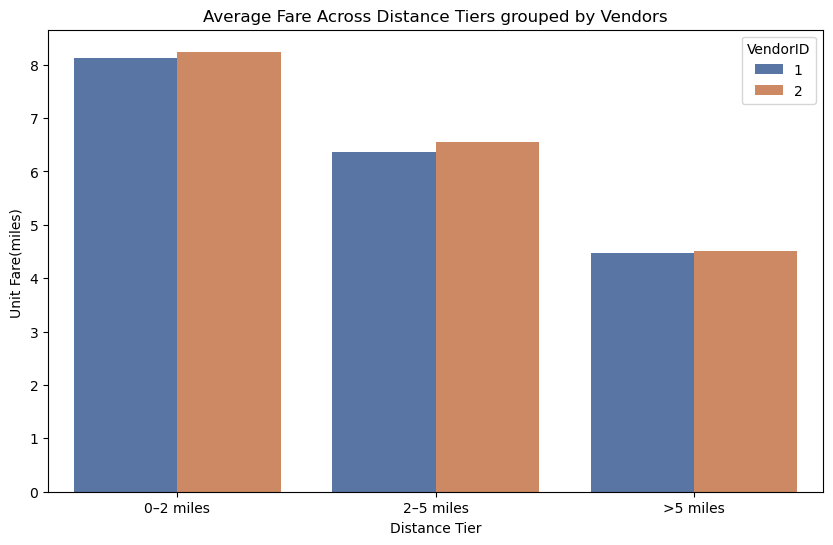

In [281]:
plt.figure(figsize=(10, 6))
sns.barplot(data=distance_tier_fare, x='distance_tier', y='unit_fare', hue='VendorID', palette= 'deep')

plt.title('Average Fare Across Distance Tiers grouped by Vendors')
plt.xlabel('Distance Tier')
plt.ylabel('Unit Fare(miles) ')

plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [283]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_filter['tip_percent'] = (df_filter.tip_amount / df_filter.fare_amount) * 100
distance_tip = df_filter.groupby('distance_tier')['tip_percent'].mean().reset_index()
distance_tip

/var/folders/p3/2hr4fjln27j60318qhkz2j1m0000gn/T/ipykernel_41852/1807462547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['tip_percent'] = (df_filter.tip_amount / df_filter.fare_amount) * 100


distance_tier  tip_percent
0     0–2 miles    21.334202
1     2–5 miles          inf
2      >5 miles          inf

In [285]:
#infinity checks
df_valid_tip = df_filter[(df_filter['fare_amount'] > 0) & (df_filter['tip_amount'] >= 0)]
df_valid_tip ['tip_percent'] = (df_valid_tip.tip_amount / df_valid_tip.fare_amount) * 100
distance_tip = df_valid_tip.groupby('distance_tier')['tip_percent'].mean().reset_index()
distance_tip

/var/folders/p3/2hr4fjln27j60318qhkz2j1m0000gn/T/ipykernel_41852/2343595136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_tip ['tip_percent'] = (df_valid_tip.tip_amount / df_valid_tip.fare_amount) * 100


distance_tier  tip_percent
0     0–2 miles    21.334202
1     2–5 miles    18.824461
2      >5 miles    16.797615

In [287]:
#six=df_valid_tip.passenger_count[df_valid_tip.passenger_count ==6]
#six
#passenger_tip = df_valid_tip.groupby(six)['tip_percent'].mean().reset_index()
#passenger_tip
passenger_tip = df_valid_tip.groupby('passenger_count')['tip_percent'].mean().reset_index()
passenger_tip
#print(df_filter.passenger_count.unique())
#print(df_valid_tip.passenger_count.unique())

passenger_count  tip_percent
0              1.0    19.754784
1              2.0    18.866158
2              3.0    18.052697
3              4.0    16.683128
4              5.0    19.452903
5              6.0    19.580533

In [291]:
hourly_tip=df_valid_tip.groupby('pickup_hour')['tip_percent'].mean().reset_index()
hourly_tip

pickup_hour  tip_percent
0             0    19.694342
1             1    19.441154
2             2    19.311211
3             3    18.578205
4             4    17.336112
5             5    17.272652
6             6    17.764326
7             7    18.967775
8             8    19.217114
9             9    18.933287
10           10    18.554861
11           11    18.371834
12           12    18.413974
13           13    18.198200
14           14    18.248966
15           15    18.288807
16           16    19.616919
17           17    20.315651
18           18    20.927926
19           19    20.897924
20           20    20.537036
21           21    20.748884
22           22    20.439309
23           23    19.813915

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

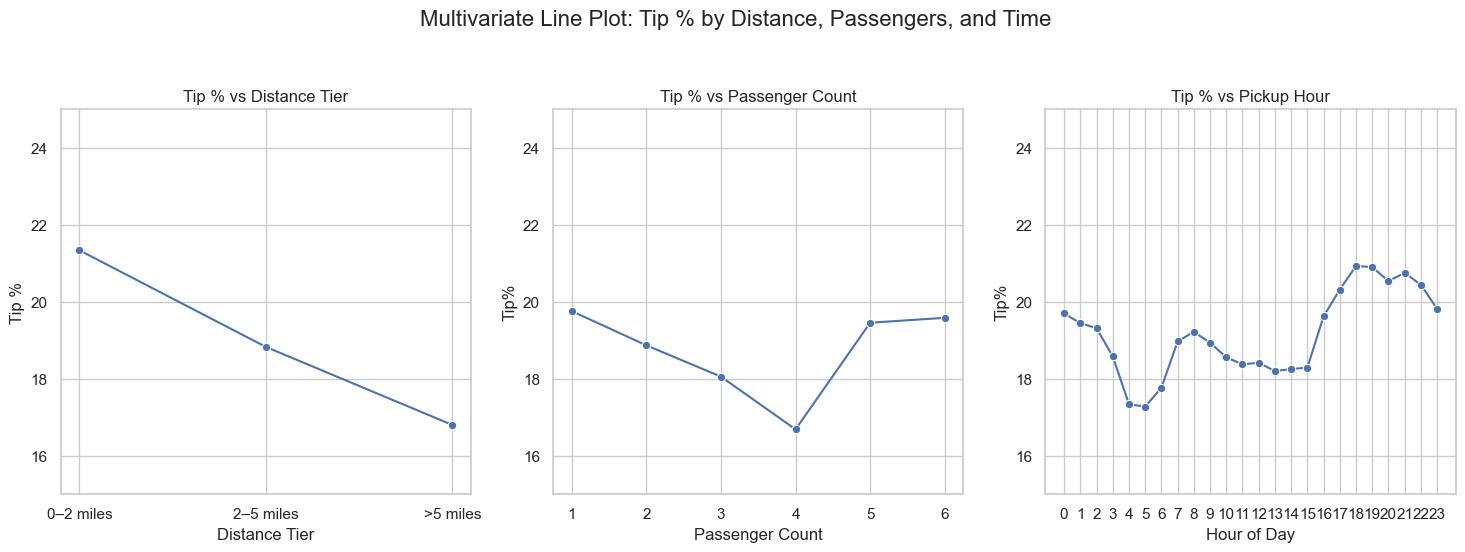

In [293]:
sns.set(style='whitegrid')

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

#Tip % vs Distance Tier
sns.lineplot(data=distance_tip, x='distance_tier', y='tip_percent', marker='o', ax=axs[0])
axs[0].set_title('Tip % vs Distance Tier')
axs[0].set_xlabel('Distance Tier')
axs[0].set_ylabel('Tip %')
axs[0].set_ylim(15, 25)

#Tip % vs Passenger Count
sns.lineplot(data=passenger_tip.sort_values('passenger_count'), x='passenger_count', y='tip_percent', marker='o', ax=axs[1])
axs[1].set_title('Tip % vs Passenger Count')
axs[1].set_xlabel('Passenger Count')
axs[1].set_ylabel('Tip%')
axs[1].set_ylim(15, 25)

#Tip % vs Pickup Hour
sns.lineplot(data=hourly_tip.sort_values('pickup_hour'), x='pickup_hour', y='tip_percent', marker='o', ax=axs[2])
axs[2].set_title('Tip % vs Pickup Hour')
axs[2].set_xlabel('Hour of Day')
axs[2].set_ylabel('Tip%')
axs[2].set_xticks(range(0, 24))
axs[2].set_ylim(15, 25)
axs[2].grid(True)


plt.suptitle('Multivariate Line Plot: Tip % by Distance, Passengers, and Time', fontsize=16, y=1.08)
plt.show()

In [295]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
l_tips = df_valid_tip[df_valid_tip.tip_percent < 10]
h_tips = df_valid_tip[df_valid_tip.tip_percent> 25]
comparison = pd.DataFrame({
    'Metric': ['Average Fare', 'Average Distance', 'Average Trip Duration', 'Passenger Count'],
    'Low Tip (<10%)': [
        l_tips['fare_amount'].mean(),
        l_tips['trip_distance'].mean(),
        l_tips['trip_duration'].mean(),
        l_tips['passenger_count'].mode()[0]
    ],
    'High Tip (>25%)': [
        h_tips['fare_amount'].mean(),
        h_tips['trip_distance'].mean(),
        h_tips['trip_duration'].mean(),
        h_tips['passenger_count'].mode()[0]
    ]
})
comparison

Metric  Low Tip (<10%)  High Tip (>25%)
0           Average Fare       25.170741        17.140151
1       Average Distance        4.788684         2.925980
2  Average Trip Duration       23.006437        15.272776
3        Passenger Count        1.000000         1.000000

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [297]:
# See how passenger count varies across hours and days

passengercount_days = df_valid_tip.groupby('pickup_day')['passenger_count'].mean().reindex(weekday_axis).reset_index()
passengercount_days


pickup_day  passenger_count
0     Monday         1.378023
1    Tuesday         1.352198
2  Wednesday         1.343875
3   Thursday         1.355465
4     Friday         1.413435
5   Saturday         1.495406
6     Sunday         1.472058

In [58]:
passengercount_hourly = df_valid_tip.groupby('pickup_hour')['passenger_count'].mean().reset_index()
passengercount_hourly

pickup_hour  passenger_count
0             0         1.423839
1             1         1.432810
2             2         1.440525
3             3         1.435139
4             4         1.412679
5             5         1.316754
6             6         1.282774
7             7         1.309521
8             8         1.306617
9             9         1.345177
10           10         1.377821
11           11         1.386905
12           12         1.400686
13           13         1.419752
14           14         1.420016
15           15         1.431535
16           16         1.427247
17           17         1.404812
18           18         1.390710
19           19         1.400817
20           20         1.401565
21           21         1.419476
22           22         1.433385
23           23         1.424332

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [72]:
# How does passenger count vary across zones
passenger_by_zone = (
    df_valid_tip.groupby('PU_zone')['passenger_count']
    .mean()
    .reset_index()
    .sort_values(by='passenger_count', ascending=False)
)

passenger_by_zone.head(5)

PU_zone  passenger_count
2      Arrochar/Fort Wadsworth              3.0
199  Springfield Gardens North              3.0
11     Bay Terrace/Fort Totten              3.0
23              Brighton Beach              2.5
51           Crotona Park East              2.5

In [164]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_trips = zones_new.merge(
    avg_passenger_by_zone,
    how='left',
    left_on='zone', 
    right_on='PU_zone'
)




In [172]:
zones_with_trips.drop(columns=['PU_zone_x','PU_zone_y'], inplace=True)
zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)


In [174]:
avg_passenger_by_zone.columns

Index(['PU_zone', 'avg_passenger_count'], dtype='object')

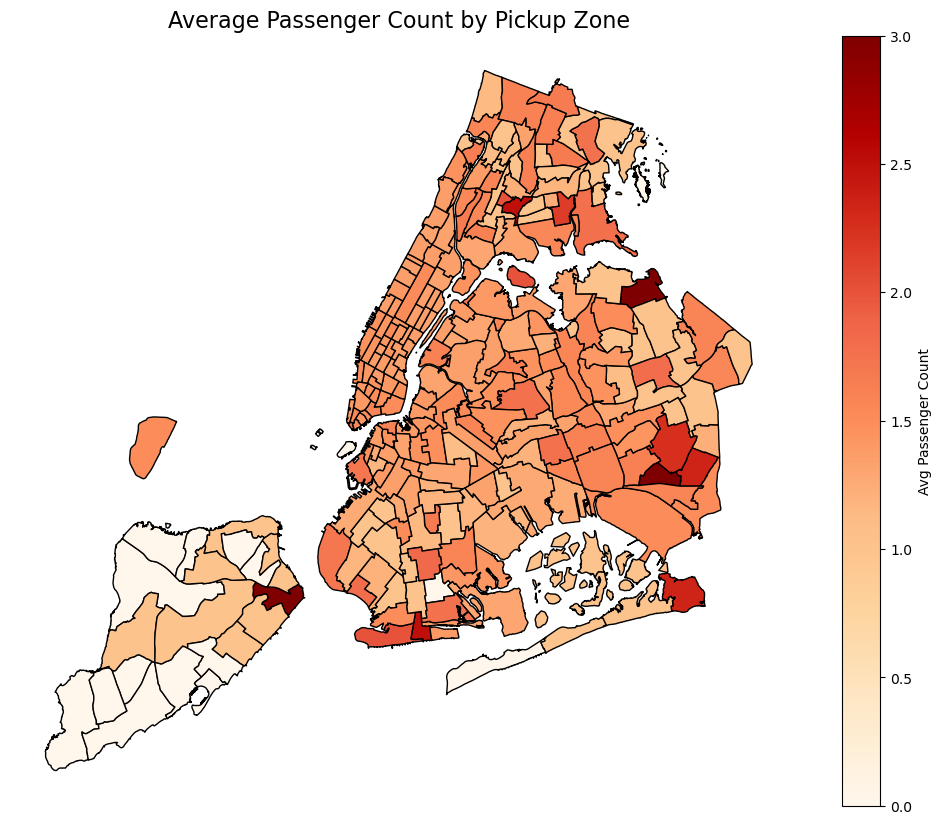

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
zones_with_trips.plot(
    column='avg_passenger_count',
    cmap='OrRd',
    ax=ax,
    legend=True,
    edgecolor='black',
    legend_kwds={'label': "Avg Passenger Count", 'orientation': "vertical"}
)
ax.set_title('Average Passenger Count by Pickup Zone', fontsize=16)
plt.axis('off')
plt.show()

Areas with deep red are places where the passenger count is more indicating family neighbourhoood and suburbs where people car pool.

In [154]:
avg_passenger_by_zone.head()

PU_zone  avg_passenger_count
0  Allerton/Pelham Gardens             1.666667
1            Alphabet City             1.472617
2  Arrochar/Fort Wadsworth             3.000000
3                  Astoria             1.289941
4             Astoria Park             1.714286

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [185]:
# How often is each surcharge applied?
surcharge_cols = ['extra', 'congestion_surcharge', 'improvement_surcharge', 'mta_tax']

for col in surcharge_cols:
    count = df_valid_tip[df_valid_tip[col] > 0].shape[0]
    percent = round(100 * count / df_valid_tip.shape[0], 2)
    print(f"{col}: applied in {count} trips ({percent}%)")


extra: applied in 887173 trips (63.68%)
congestion_surcharge: applied in 1292785 trips (92.79%)
improvement_surcharge: applied in 1393152 trips (100.0%)
mta_tax: applied in 1383476 trips (99.3%)


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

* Busiest hours, days and months
  ### Temporal Trends:

  1) Most pickups occur between **3 PM to 8PM** and the **peak hour** is usually at **6PM*
  2) **Busiest days** of the week is **Wednesdays and Thursday** (peak mid week activity).
  3) **Monday and Sunday** are the days with **least pickups** attributing to winding weekend and remote work on Monday.
  4) Weekends are steadier but the demands not higher than mid week.
  5) **Lowest number of pickups** are in the month of **Aug and September** attributing to summer holidays when people are out of city vacationing and less workdays in Septemeber.
  6) **May ,October and March( in that order)** has **highest pickups**.**May(Spring), March(end of winters,spring break) and October (start of fall)** have pleasant weather and contributes to tourism footfall.
  7) The **increase/peak** could thus be attributed to **pleasant weather**.

* Trends in revenue collected
   ### Monthly revenue trends:

 1) Pick up volume drives revenue collection.
 2) **May** and **October** do the  **highest monthly revenues** with more than **$4.6 million**.
 3) **March, April, and June**, follows the season trend and generates over **$4.3M** in revenue.
 4) Revenue **drops in Summer** i.e. **July , August and September** and again in **winters** i,e **January and February**.

* Trends in quarterly revenue
    ### Quarterly revenue trends

 1) Q2 (Apr–Jun) and Q4 (Oct–Dec) has the largest share of revenue both amounting to 26.8%
 2) Q1 (Jan–Mar) brought in 23.7% — despite February being lowest month. March has been an outstanding month as far as trip counts are concerned. This drove the revenue generation to a close second.
 3) July to Sep is where the revenue generation dips and this shows off with Q2 fairing with 22.7%

### OBSERVATION :Seasons,holdiays and tourist footfalls drives both trip counts, commute behaviour and subsequent revenue generation.




### RECOMMENDATION FOR OPTIMIZATION
More cabs required around weekday evenings (4 PM – 8 PM) and mornings (7 AM – 9 AM). 

May ,October and March( in that order) has highest pickups. May(Spring), March(end of winters, spring break) and October (start of fall) have pleasant weather and contributes to tourism footfall. Fleets needs to be pumped up with these trends in line.  

Drivers should find alternate routes for routes where the speed is very low but trips are high like JFK airport and LaGuardia. 

 Have larger fleet of cabs for zone where the avg pick ups are more. 

 Optimize cab counts where passenger counts are more for certain avg trips. Come up 	with car pooling programs and rewards for availing. 

Seasons, holidays and tourist footfalls drives both trip counts, commute behavior and subsequent revenue generation. 


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Enable drive shift hours based on busy and quieter hours and days.  

Optimize driver fleet based on busier quarters to meet demands and make profit. Downsize driver fleet for less busy quarters to keep operational margins better. 

Zones like Midtown, JFK, East Village consistently see high demand. Surge fares can be applied during busy hours 

Weekday traffic in commercial zone and weekend traffic on neighbour hood and residential zones indicates a pattern in possible provisioning of cab fleet based on weekday –weekend demand for optimized fleet usage. 

Late-night trips contribute lower volume but higher per-mile revenue. Introduce off peak hours and airport trip related sales or promotions to driver user adop


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Fare per Mile Tiering:Short trips (<2 miles) have a higher fare per mile due to base fare and surcharges.Tip percentages also increases here. 

0–2 miles -Keep base fare competitive to encourage short-trip volume. Have promo fares or other coupons facilitated for encouraging taxi trips. 

For 2-5 miles A slight reduction in per-mile rate to can keep us relevant and promote adoption. 

For greater than 5 miles – because of surcharges impact, we must look at fare rates can be blanketed into a standard rate to give it a more lucartive look and promote more longer trip. The fare amount has a linear relationship with trip distance. This will ensure more revenue . 

Promote shared cab options in zones with higher average passenger counts 

Longer trips (>5 miles) have a lower fare per mile, indicating possible room for distance-based incentives. Tip percentages also go down. 

Night Time Surcharges: Night hours contribute to a smaller portion of trips but apply extra surcharges.Consider some discounts to encourage people taking more taxis and by having them avoid paying more than usual 

Based on pick and drop ratio and trip demand surge, have fleets preemptively posted in the location so more requests and trips could be fullfilled. 